# **INGENIERÍA DEL DATO**

## **1. Carga de las bases de datos**

Carga de librerías necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

Carga de las dos bases de datos

In [2]:
base_datos1 = '/content/Dataset of Diabetes .csv'
base_datos2 = '/content/diabetes.xls'

In [3]:
df_1 = pd.read_csv(base_datos1)
df_2 = pd.read_excel(base_datos2, engine='xlrd')


*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


## **2. Exploración de variables de la base de datos csv**

### 2.1. Observación de la cabecera de la base de datos.

In [4]:
df_1.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


### 2.2. Visualización de las columnas y el tipo de datos que contiene cada columna.

In [5]:
df_1.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [6]:
df_1.dtypes

ID             int64
No_Pation      int64
Gender        object
AGE            int64
Urea         float64
Cr             int64
HbA1c        float64
Chol         float64
TG           float64
HDL          float64
LDL          float64
VLDL         float64
BMI          float64
CLASS         object
dtype: object

**DESCRIPCIÓN DE CADA VARIABLE**
<br>
**ID:** id del paciente
<br>
**No_Pation:** número del paciente
<br>
**Gender:** género del paciente (Male-M/Female-F)
<br>
**AGE:** edad del paciente. Medida: años
<br>
**Urea:** niveles de nitrógeno ureico. Medida: mmol/L
<br>
**Cr:** (Creatinine ratio) niveles de creatinina en sangre. Medida: mmol/L
<br>
**HbA1c:** niveles de hemoglobina glicosilada. Medida: %
<br>
**Chol:** niveles de colersteról total. Medida: mmol/L
<br>
**TG:** (triglycerides) niveles de triglicéridos. Medida: mmol/L
<br>
**HDL:** (High Density Lipoprotein) niveles de colesterol de lipoproteínas de alta densidad. Medida: mmol/L
<br>
**LDL:** (Low Density Lipoprotein) niveles de colesterol de lipoproteínas de baja densidad. Medida: mmol/L
<br>
**VLDL:** (Very Low Density Lipoprotein) niveles de colesterol de lipoproteínas de muy baja densidad. Medida: mmol/L
<br>
**BMI:** (Body Mass Index) en español IMC (índice de masa corporal) usado para identificar la categoría de peso y caluclado mediante la división de peso/altura.
<br>
**CLASS:** Clasifiación en diabtes (Y), prediabetes (P) o no diabetes (N)

### 2.3. Número de observaciones en el dataframe.

In [7]:
num_observaciones_df_1 = len(df_1)
print(num_observaciones_df_1)

1000


### 2.4. Búsqueda de valores nulos y NA.

In [8]:
df_1.isnull().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

No existen valores NA en ninguna columna

In [9]:
df_1.eq(0).sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         1
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

Existe un valor 0 en la columna de colesterol. A continuación, buscaremos dónde está esta observación.

In [10]:
df_1.loc[df_1['Chol'] == 0]

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
99,186,454316,M,77,5.0,106,5.4,0.0,2.8,0.8,1.8,0.7,19.0,N


La observación con valor nulo de colesterol es la observación 99. A continuación, se eliminará esta observación.

In [11]:
df_1 = df_1.drop(99)

In [12]:
df_1.eq(0).sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

Como se observa ya no hay ninguna variable con valores nulos.

## **3. Estudio de las variables según el tipo**

### 3.1.Variables Categóricas: Las variables categóricas existentes son Gender y CLASS.

CLASS es la variable target, ya que indica si un paciente tiene diabetes/prediabetes o no diabetes. Esta variable será significativa posteriormente para medir el grado de precisión de los modelos que se realizarán.

### 3.1.1 Frecuencias de Gender (Female/Male) y CLASS (Normal/Prediabetic/Diabetic).

In [13]:
frec_gender = df_1['Gender'].value_counts()
print(frec_gender)

Gender
M    564
F    434
f      1
Name: count, dtype: int64


Como podemos ver existe una observación que tiene como valor f, cuando el valor correcto es F. Lo sustituimos para que coincida con los demás formatos.

In [14]:
df_1['Gender'].replace('f', 'F', inplace=True)
frec_gender = df_1['Gender'].value_counts()
print(frec_gender)

Gender
M    564
F    435
Name: count, dtype: int64


Visualización de la distribución por género

Text(0.5, 1.0, 'Distribuación del género')

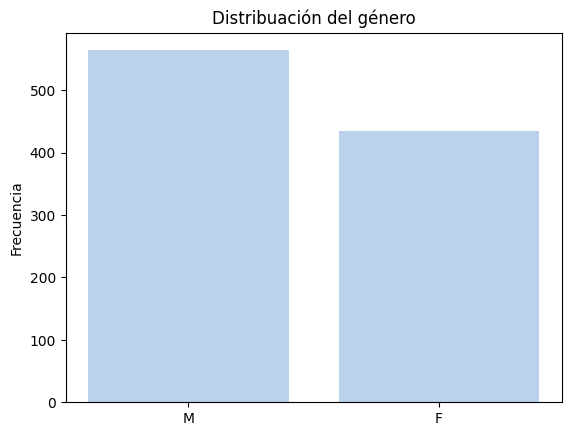

In [15]:
fig, ax = plt.subplots()
ax.set_ylabel("Frecuencia")
plt.bar(frec_gender.index, frec_gender.values, color='#bbd2ec')
plt.title("Distribuación del género")

Existen 564 hombres (Male-M) y 435 mujeres (Female-F)

Estudio de la variable CLASS

In [16]:
frec_CLASS = df_1['CLASS'].value_counts()
print(frec_CLASS)

CLASS
Y     840
N     101
P      53
Y       4
N       1
Name: count, dtype: int64


Existen valores N (1) e Y (4) que los lee como distintos. Buscamos esas observaciones y reemplazamos su valor con N e Y, para que la cuenta este bien realizada.

In [17]:
df_1.loc[df_1['CLASS'] == 'N']

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,180,454316,F,54,6.3,106,5.6,4.3,2.0,1.3,2.2,0.9,20.0,N
97,181,454316,F,50,3.3,70,4.9,3.7,0.9,1.2,2.7,0.6,24.0,N
98,182,454316,M,60,7.5,70,0.9,3.4,5.3,1.1,3.6,0.8,24.0,N
100,190,454316,F,59,4.7,58,4.1,4.5,1.8,1.8,1.8,1.3,22.5,N


In [18]:
df_1.loc[102, 'CLASS'] = 'N'
no_N = df_1['CLASS'].value_counts()['N']
print(no_N)

102


In [19]:
no_N = df_1['CLASS'].value_counts()['P']
df_1.loc[df_1['CLASS'] == 'P']

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
103,472,463,M,34,3.9,81,6.0,6.2,3.9,0.80,1.90,1.8,23.0,P
104,85,46300,M,34,3.9,81,6.0,6.2,3.9,0.80,3.80,1.8,23.0,P
105,710,87671,M,34,3.9,81,6.0,6.2,3.9,0.80,3.80,1.8,23.0,P
106,429,48036,M,31,3.4,55,5.7,4.9,1.6,1.00,3.20,0.7,24.0,P
107,702,87667,M,31,3.4,55,5.7,4.9,1.6,1.00,3.20,0.7,24.0,P
108,4,34301,F,43,2.1,55,5.7,4.7,5.3,0.90,1.70,2.4,25.0,P
109,189,30383,M,42,5.4,53,5.8,5.9,3.7,1.30,3.10,1.7,23.0,P
110,201,45573,M,47,4.1,87,6.2,3.7,1.8,1.00,2.00,0.8,23.0,P
111,285,47069,M,50,4.3,59,6.1,4.0,3.0,1.00,1.80,1.3,24.0,P
112,393,47496,M,49,5.0,74,6.2,2.0,0.8,0.60,1.00,0.4,25.0,P


In [20]:
no_Y = df_1['CLASS'].value_counts()['Y']
df_1.loc[df_1['CLASS'] == 'Y']

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
156,12,23975,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
157,18,23977,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
158,24,23979,M,45,4.1,63,10.2,4.8,1.3,0.9,3.3,9.5,34.3,Y
159,675,33656789,M,45,4.1,63,10.2,4.8,1.3,0.9,3.3,9.5,34.3,Y
160,39,23984,M,45,5.3,77,11.2,3.9,1.5,1.3,2.0,10.4,29.5,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,195,4543,F,55,4.1,34,13.9,5.4,1.6,1.6,3.1,0.7,33.0,Y
992,196,454316,M,55,3.1,39,8.5,5.0,2.5,1.9,2.9,0.7,27.0,Y
993,198,454316,M,28,3.5,61,8.5,4.5,1.9,1.1,2.6,0.8,37.0,Y
994,199,454316,M,69,10.3,185,7.7,4.9,1.9,1.2,3.0,0.7,37.0,Y


In [21]:
df_1.loc[996, 'CLASS'] = 'Y'
df_1.loc[997, 'CLASS'] = 'Y'
df_1.loc[998, 'CLASS'] = 'Y'
df_1.loc[999, 'CLASS'] = 'Y'
no_N = df_1['CLASS'].value_counts()['Y']
print(no_N)

844


In [22]:
no_Y = df_1['CLASS'].value_counts()['Y']
df_1.loc[df_1['CLASS'] == 'Y']

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
156,12,23975,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
157,18,23977,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
158,24,23979,M,45,4.1,63,10.2,4.8,1.3,0.9,3.3,9.5,34.3,Y
159,675,33656789,M,45,4.1,63,10.2,4.8,1.3,0.9,3.3,9.5,34.3,Y
160,39,23984,M,45,5.3,77,11.2,3.9,1.5,1.3,2.0,10.4,29.5,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


Visualización de la variable CLASS

Text(0.5, 1.0, 'Distribuación de diabéticos')

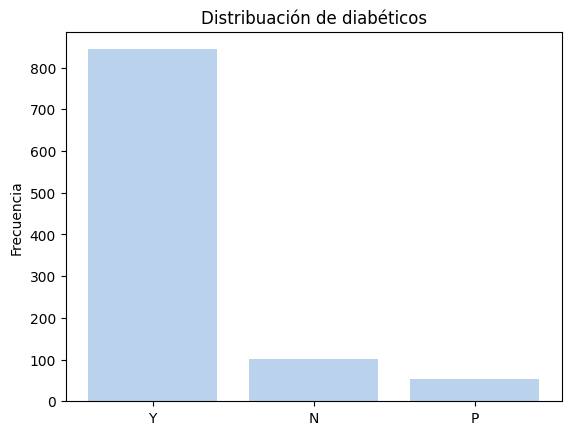

In [23]:
frec_CLASS = df_1['CLASS'].value_counts()
fig, ax = plt.subplots()
ax.set_ylabel("Frecuencia")
plt.bar(frec_CLASS.index, frec_CLASS.values, color='#bbd2ec')
plt.title("Distribuación de diabéticos")

Existen 102 sin diabétes, 53 prediabéticos y 844 diabéticos.

### 3.2. Variables Numéricas: Se seleccionan las variables numéricas.

In [24]:
df_1numericas = df_1.select_dtypes(include=['number'])
print(df_1numericas.columns)

Index(['ID', 'No_Pation', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL',
       'LDL', 'VLDL', 'BMI'],
      dtype='object')


Se exluyen las variables ID y No_Pation, ya que no contienen información relevante para la realización del estudio.

In [25]:
df_1numericas_importantes = df_1numericas.drop(['ID', 'No_Pation'], axis=1)
print(df_1numericas_importantes)

     AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI
0     50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0
1     26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6  23.0
2     50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0
3     50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0
4     33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4  21.0
..   ...   ...  ..    ...   ...  ...  ...  ...   ...   ...
995   71  11.0  97    7.0   7.5  1.7  1.2  1.8   0.6  30.0
996   31   3.0  60   12.3   4.1  2.2  0.7  2.4  15.4  37.2
997   30   7.1  81    6.7   4.1  1.1  1.2  2.4   8.1  27.4
998   38   5.8  59    6.7   5.3  2.0  1.6  2.9  14.0  40.5
999   54   5.0  67    6.9   3.8  1.7  1.1  3.0   0.7  33.0

[999 rows x 10 columns]


### 3.2.1. Estudio de estadísticos importantes.

In [26]:
df_1numericas_importantes.describe()

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,53.504505,5.124868,68.905906,8.284044,4.867688,2.349159,1.205155,2.610601,1.855856,29.588609
std,8.772208,2.936633,60.003316,2.533630,1.293252,1.401805,0.660620,1.115365,3.665252,4.953558
min,20.000000,0.500000,6.000000,0.900000,0.500000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


### 3.2.2. Realización de gráficos para descubrir tendencias en los datos.

Las medidas usadas en las observaciones de esta base de datos posiblemente se expresan en mmol/L (milimoles por litro).

**Gráficos de la frecuencia de las variables mediante la realización de histogramas.**



*  AGE




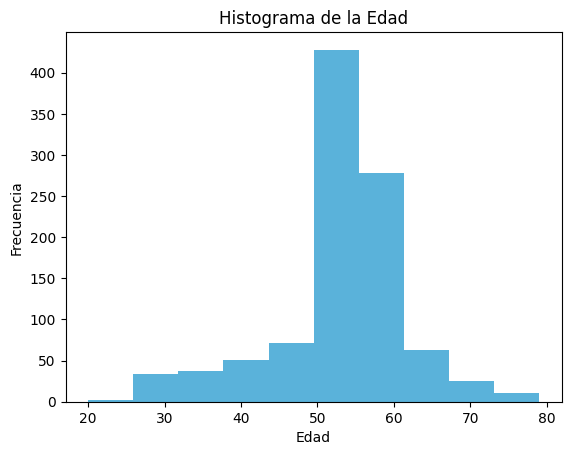

In [27]:
plt.hist(df_1numericas_importantes['AGE'], color='#5ab2da')
plt.title("Histograma de la Edad")
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

Como podemos comprobar la distribución de la edad sigue una distribución normal. La edad más freceunte está entre los 50 y 60 años. A continuación, se visualiza la edad en función de la variable CLASS.

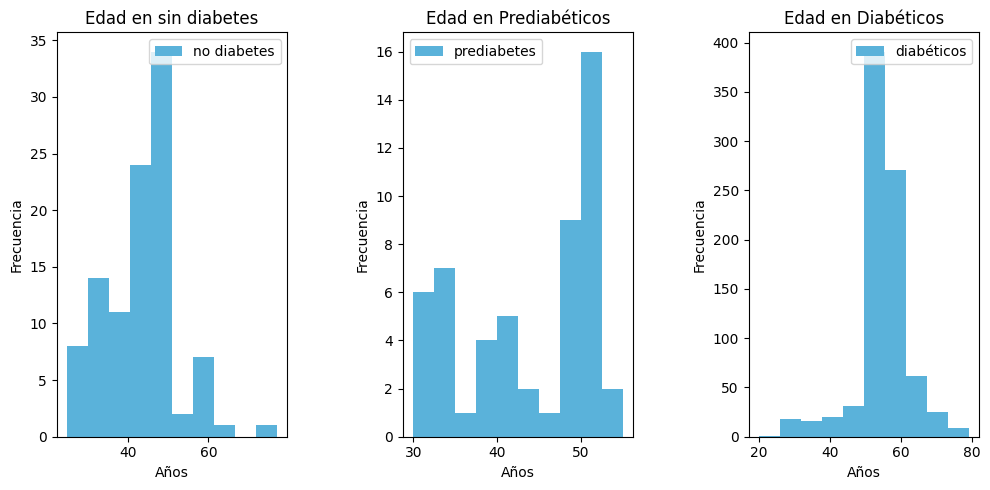

In [28]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
ax1 = plt.subplot(131)
plt.hist(df_1.query('CLASS == "N"')['AGE'], label='no diabetes', color='#5ab2da')
plt.title("Edad en sin diabetes")
plt.xlabel('Años')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

ax2 = plt.subplot(132)
plt.hist(df_1.query('CLASS == "P"')['AGE'], label='prediabetes', color='#5ab2da')
plt.title("Edad en Prediabéticos")
plt.xlabel('Años')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

ax3 = plt.subplot(133)
plt.title("Edad en Diabéticos")
plt.hist(df_1.query('CLASS == "Y"')['AGE'],label='diabéticos', color='#5ab2da')
plt.xlabel('Años')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

plt.subplots_adjust(hspace=0.5, wspace=0.5)



*   Urea



Visualización de los niveles de Urea por clases.

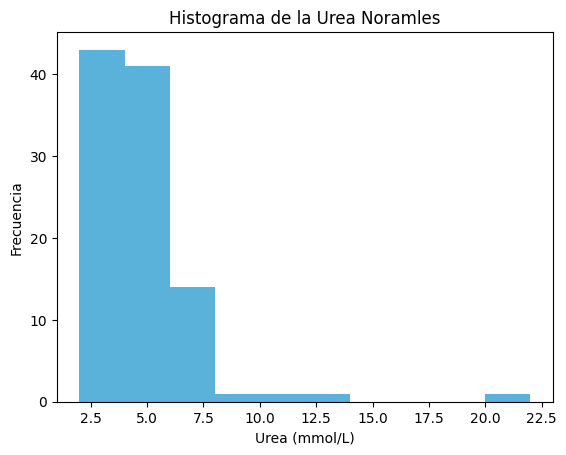

In [29]:
plt.hist(df_1.query('CLASS == "N"')['Urea'], color='#5ab2da')
plt.title("Histograma de la Urea Noramles")
plt.xlabel('Urea (mmol/L)')
plt.ylabel('Frecuencia')
plt.show()

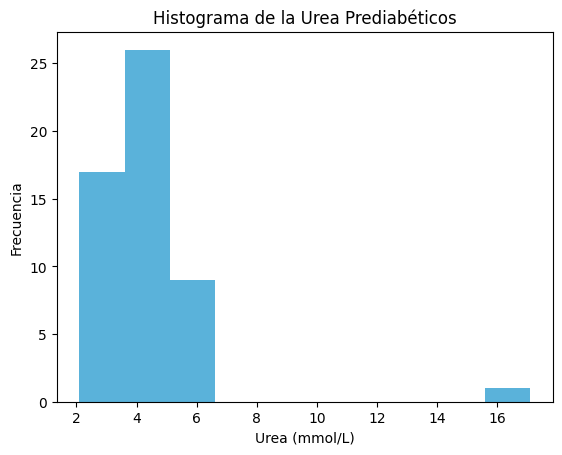

In [30]:
plt.hist(df_1.query('CLASS == "P"')['Urea'], color='#5ab2da')
plt.title("Histograma de la Urea Prediabéticos")
plt.xlabel('Urea (mmol/L)')
plt.ylabel('Frecuencia')
plt.show()

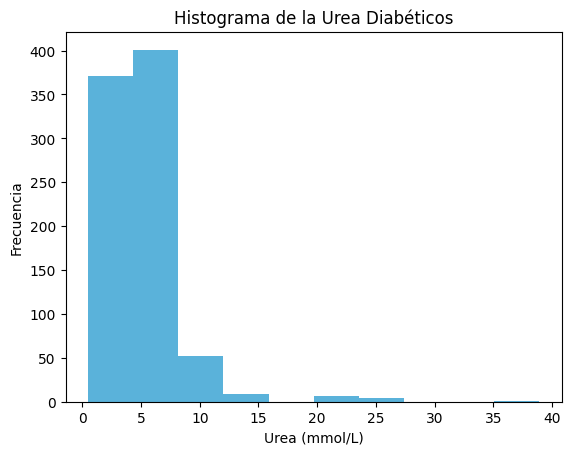

In [31]:
plt.hist(df_1.query('CLASS == "Y"')['Urea'], color='#5ab2da')
plt.title("Histograma de la Urea Diabéticos")
plt.xlabel('Urea (mmol/L)')
plt.ylabel('Frecuencia')
plt.show()



*   Cr



Visualización de los niveles de creatinina por clases.

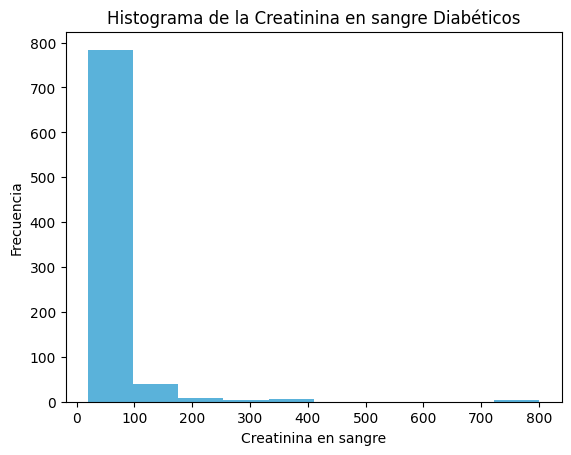

In [32]:
plt.hist(df_1.query('CLASS == "Y"')['Cr'], color='#5ab2da')
plt.title("Histograma de la Creatinina en sangre Diabéticos")
plt.xlabel('Creatinina en sangre')
plt.ylabel('Frecuencia')
plt.show()

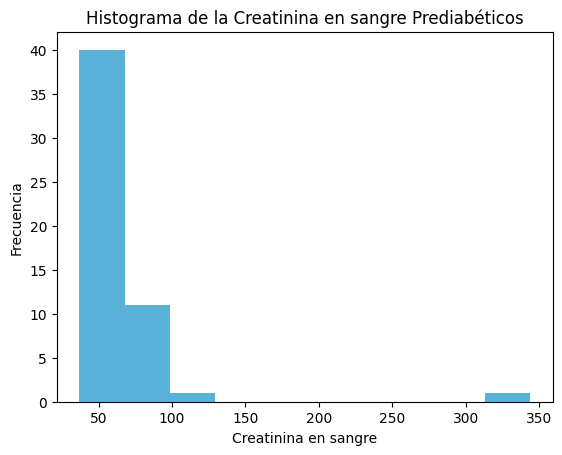

In [33]:
plt.hist(df_1.query('CLASS == "P"')['Cr'], color='#5ab2da')
plt.title("Histograma de la Creatinina en sangre Prediabéticos")
plt.xlabel('Creatinina en sangre')
plt.ylabel('Frecuencia')
plt.show()

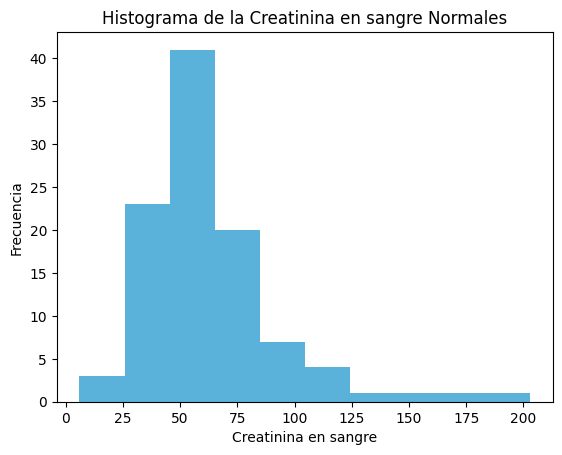

In [34]:
plt.hist(df_1.query('CLASS == "N"')['Cr'], color='#5ab2da')
plt.title("Histograma de la Creatinina en sangre Normales")
plt.xlabel('Creatinina en sangre')
plt.ylabel('Frecuencia')
plt.show()



*   HbA1c



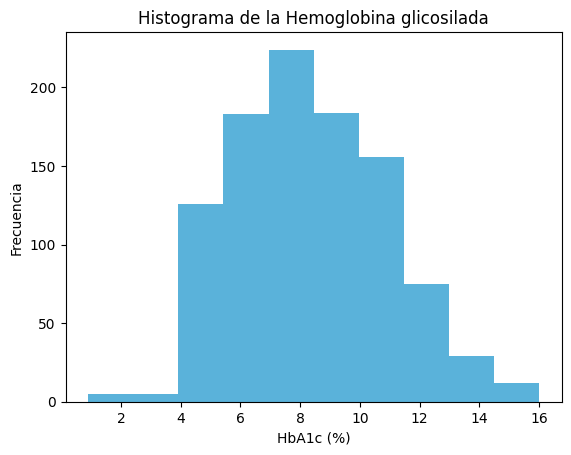

In [35]:
plt.hist(df_1numericas_importantes['HbA1c'], color='#5ab2da')
plt.title("Histograma de la Hemoglobina glicosilada")
plt.xlabel('HbA1c (%)')
plt.ylabel('Frecuencia')
plt.show()

Visualización de los niveles de HbA1c según diabéticos, prediabéticos o sin diabetes.

Text(0.5, 1.0, 'Distribución de la diabetes')

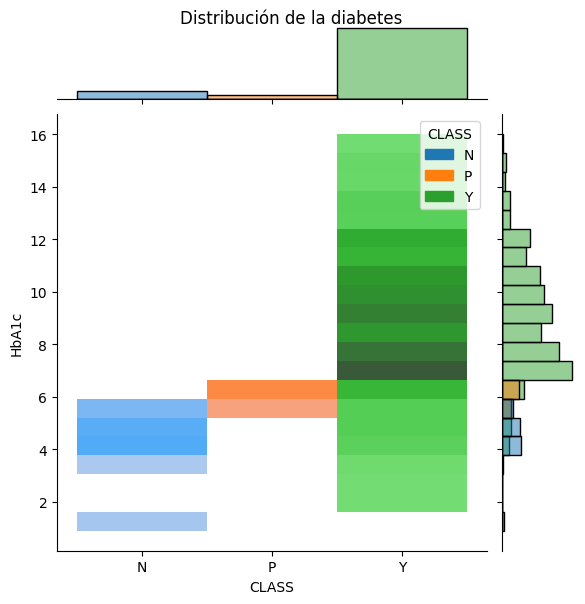

In [36]:
fig = sns.jointplot(x=df_1['CLASS'], y=df_1numericas_importantes['HbA1c'], kind="hist", hue=df_1['CLASS'])
fig.fig.suptitle("Distribución de la diabetes", y=1.0)

NOTA: los niveles normales se sitúan entre 4 y 6.5%. Aunque cabe destacar, que está variable es una de las más significativas e importantes a la hora de predecir la diabetes, ya que mide el nivel promedio de glucosa en sangre durante los últimos 2-3 meses.


*   Niveles < 5.7% indica niveles normales.
*   Niveles entre 5.7% y 6.4% indican prediabetes.
*   Niveles > 6.5% indican diabetes.





*   Chol



Visualización del colesterol en función de la variable CLASS

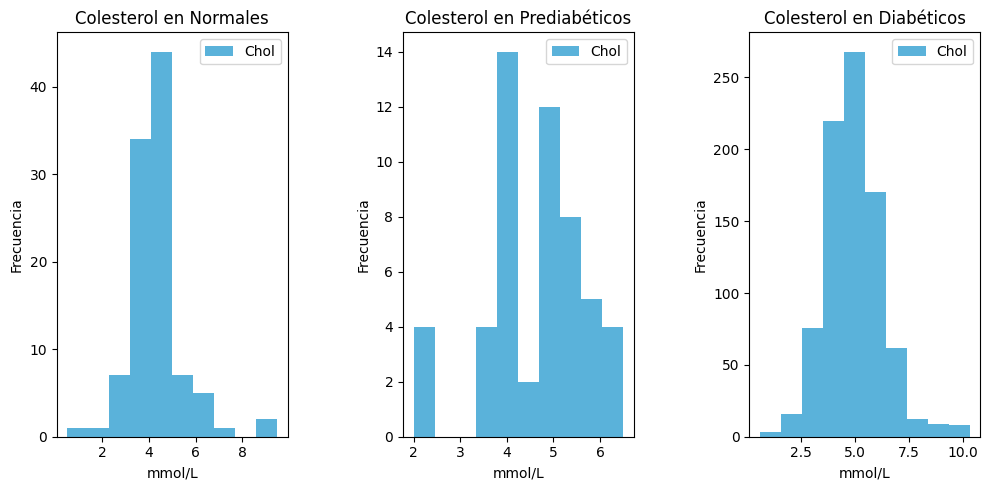

In [37]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
ax1 = plt.subplot(131)
plt.hist(df_1.query('CLASS == "N"')['Chol'], label="Chol", color='#5ab2da')
plt.title("Colesterol en Normales")
plt.xlabel('mmol/L')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

ax2 = plt.subplot(132)
plt.hist(df_1.query('CLASS == "P"')['Chol'], label="Chol", color='#5ab2da')
plt.title("Colesterol en Prediabéticos")
plt.xlabel('mmol/L')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

ax3 = plt.subplot(133)
plt.title("Colesterol en Diabéticos")
plt.hist(df_1.query('CLASS == "Y"')['Chol'], label="Chol", color='#5ab2da')
plt.xlabel('mmol/L')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

plt.subplots_adjust(hspace=0.5, wspace=0.5)



*   TG



Visualización de los triglicéridos en función de la variable CLASS.

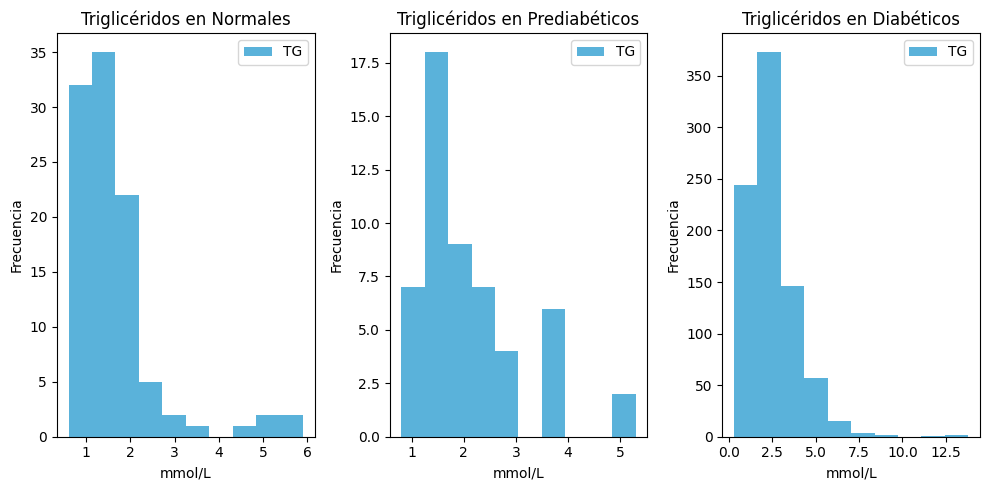

In [38]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
ax1 = plt.subplot(131)
plt.hist(df_1.query('CLASS == "N"')['TG'], label="TG", color='#5ab2da')
plt.title("Triglicéridos en Normales")
plt.xlabel('mmol/L')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

ax2 = plt.subplot(132)
plt.hist(df_1.query('CLASS == "P"')['TG'], label="TG", color='#5ab2da')
plt.title("Triglicéridos en Prediabéticos")
plt.xlabel('mmol/L')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

ax3 = plt.subplot(133)
plt.title("Triglicéridos en Diabéticos")
plt.hist(df_1.query('CLASS == "Y"')['TG'], label="TG", color='#5ab2da')
plt.xlabel('mmol/L')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

plt.show()



*   HDL



Visualización del HDL en función de la variable CLASS.

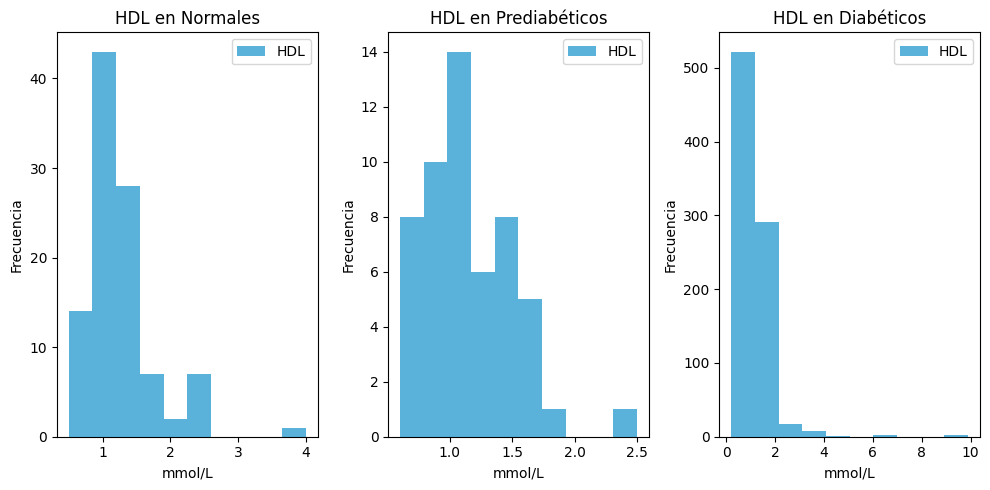

In [39]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
ax1 = plt.subplot(131)
plt.hist(df_1.query('CLASS == "N"')['HDL'], label="HDL", color='#5ab2da')
plt.title("HDL en Normales")
plt.xlabel('mmol/L')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

ax2 = plt.subplot(132)
plt.hist(df_1.query('CLASS == "P"')['HDL'], label="HDL", color='#5ab2da')
plt.title("HDL en Prediabéticos")
plt.xlabel('mmol/L')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()


ax3 = plt.subplot(133)
plt.title("HDL en Diabéticos")
plt.hist(df_1.query('CLASS == "Y"')['HDL'], label="HDL", color='#5ab2da')
plt.xlabel('mmol/L')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

plt.show()



*   LDL



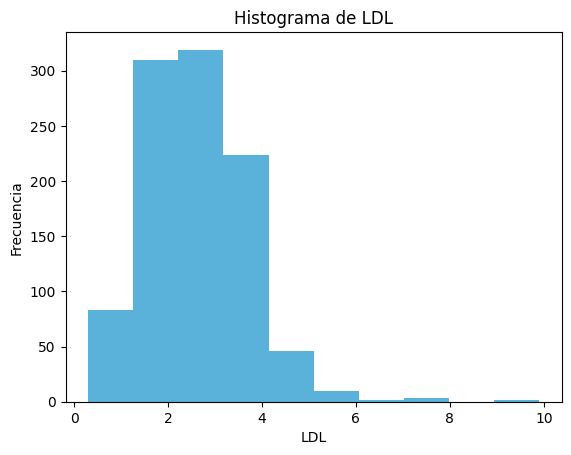

In [40]:
plt.hist(df_1['LDL'], color='#5ab2da')
plt.title("Histograma de LDL")
plt.xlabel('LDL')
plt.ylabel('Frecuencia')
plt.show()

Visualización de la variable LDL en función de la variable CLASS.

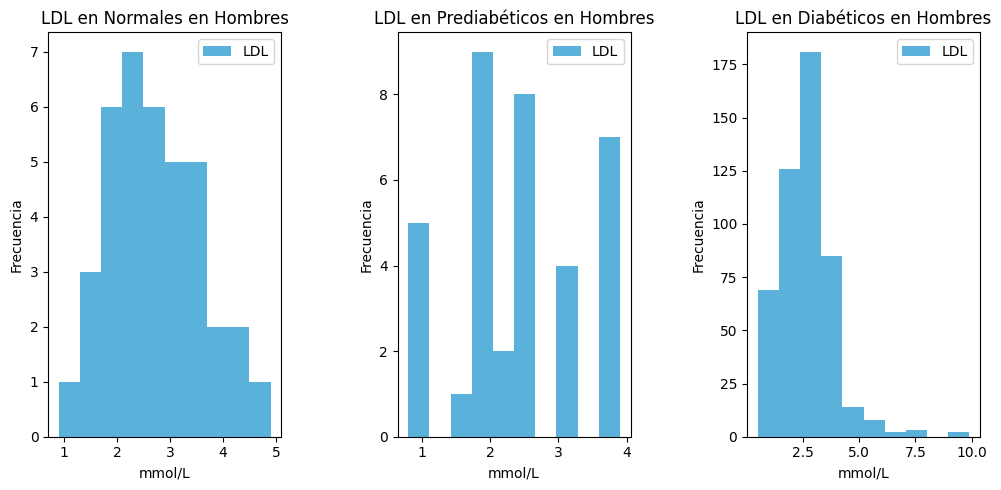

In [41]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
ax1 = plt.subplot(131)
plt.hist(df_1.query('CLASS == "N" & Gender=="M"')['LDL'], label="LDL", color='#5ab2da')
plt.title("LDL en Normales en Hombres")
plt.xlabel('mmol/L')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

ax2 = plt.subplot(132)
plt.hist(df_1.query('CLASS == "P"  & Gender=="M"')['LDL'], label="LDL", color='#5ab2da')
plt.title("LDL en Prediabéticos en Hombres")
plt.xlabel('mmol/L')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()


ax3 = plt.subplot(133)
plt.title("LDL en Diabéticos en Hombres")
plt.hist(df_1.query('CLASS == "Y"  & Gender=="M"')['LDL'], label="LDL", color='#5ab2da')
plt.xlabel('mmol/L')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

plt.subplots_adjust(hspace=0.5, wspace=0.5)



*   VLDL



Visualización de la variable VLDL en función de la variable CLASS.

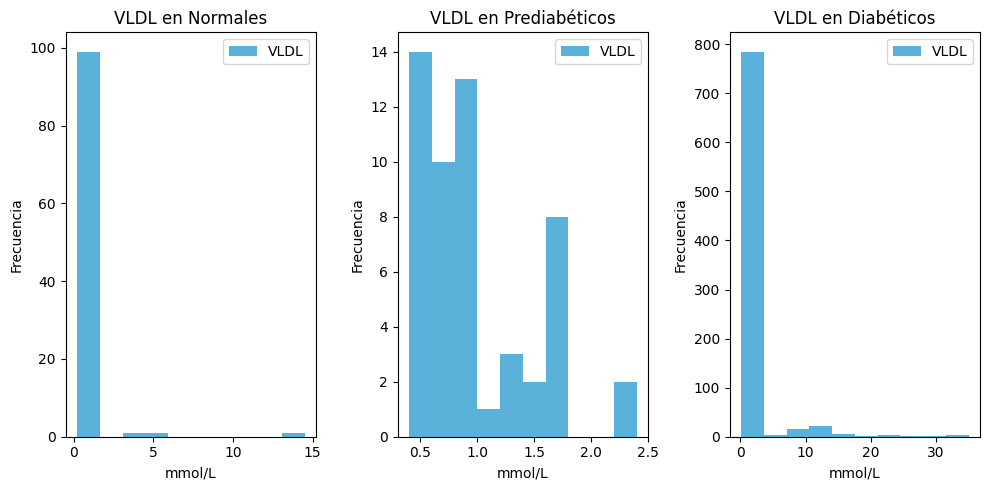

In [42]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
ax1 = plt.subplot(131)
plt.hist(df_1.query('CLASS == "N"')['VLDL'], label="VLDL", color='#5ab2da')
plt.title("VLDL en Normales")
plt.xlabel('mmol/L')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

ax2 = plt.subplot(132)
plt.hist(df_1.query('CLASS == "P"')['VLDL'], label="VLDL", color='#5ab2da')
plt.title("VLDL en Prediabéticos")
plt.xlabel('mmol/L')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()


ax3 = plt.subplot(133)
plt.title("VLDL en Diabéticos")
plt.hist(df_1.query('CLASS == "Y"')['VLDL'], label="VLDL", color='#5ab2da')
plt.xlabel('mmol/L')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

plt.show()



*   BMI



Visualización de la variable BMI en función de la variable CLASS

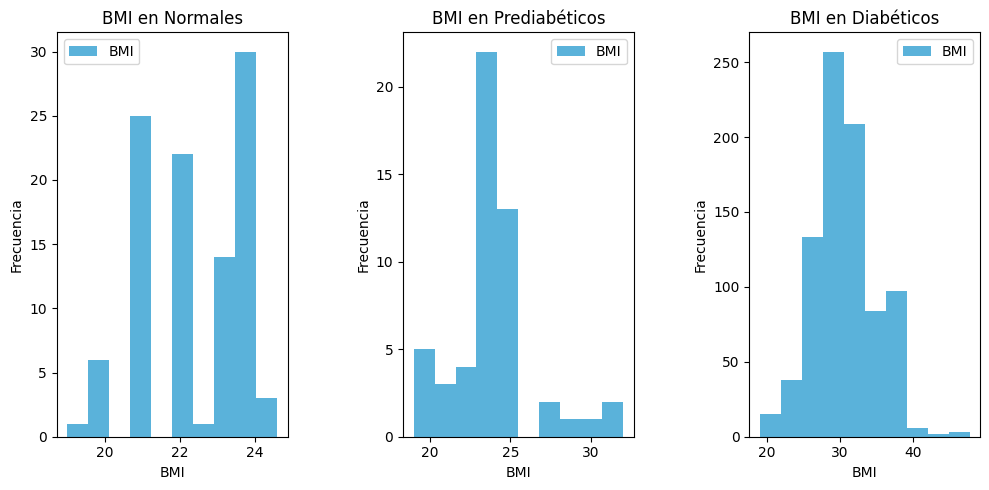

In [43]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
ax1 = plt.subplot(131)
plt.hist(df_1.query('CLASS == "N"')['BMI'], label='BMI', color='#5ab2da')
plt.title("BMI en Normales")
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

ax2 = plt.subplot(132)
plt.hist(df_1.query('CLASS == "P"')['BMI'], label='BMI', color='#5ab2da')
plt.title("BMI en Prediabéticos")
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()


ax3 = plt.subplot(133)
plt.title("BMI en Diabéticos")
plt.hist(df_1.query('CLASS == "Y"')['BMI'],label='BMI', color='#5ab2da')
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

plt.subplots_adjust(hspace=0.5, wspace=0.5)

NOTA: Los resultados posibles del IMC son los siguientes:


*   Menor de 18.5: Peso insuficiente
*   18.5 - 24.9: Peso normal
*   25 a 29.9: Sobrepeso
*   30 a 34.9: Obesidad grado I
*   35 a 39.9: Obesidad grado II
*   40 o más: Obesidad grado III



**Estudio de ouliers en las variables mediante Boxplots.**



*   AGE



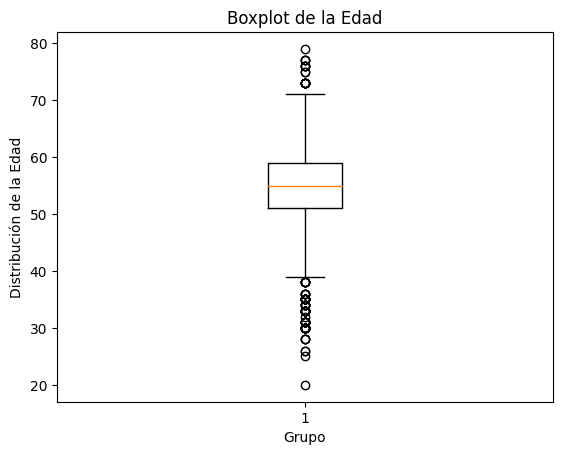

In [44]:
plt.boxplot(df_1numericas_importantes['AGE'])
plt.title('Boxplot de la Edad')
plt.xlabel('Grupo')
plt.ylabel('Distribución de la Edad')
plt.show()



*   Urea



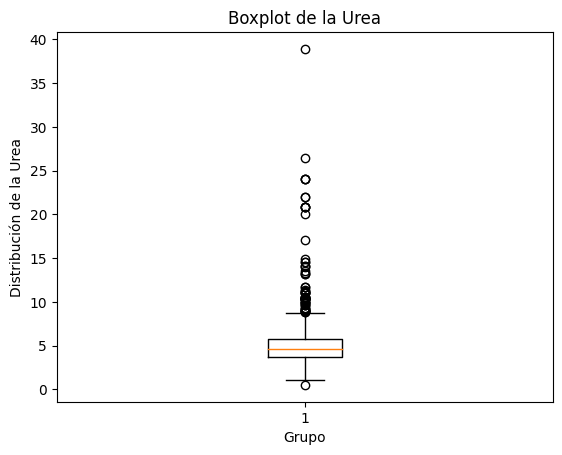

In [45]:
plt.boxplot(df_1numericas_importantes['Urea'])
plt.title('Boxplot de la Urea')
plt.xlabel('Grupo')
plt.ylabel('Distribución de la Urea')
plt.show()



*   Cr



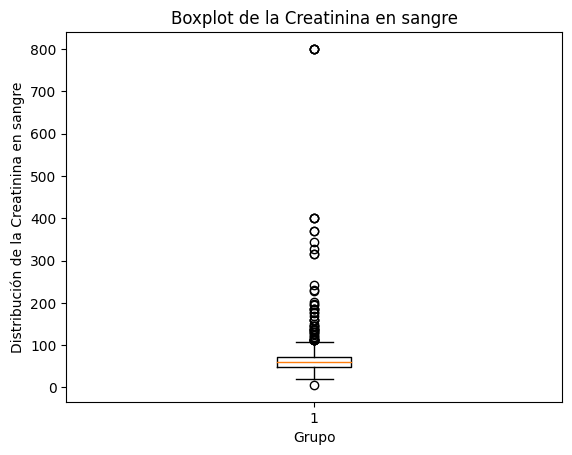

In [46]:
plt.boxplot(df_1numericas_importantes['Cr'])
plt.title('Boxplot de la Creatinina en sangre')
plt.xlabel('Grupo')
plt.ylabel('Distribución de la Creatinina en sangre')
plt.show()



*   HbA1c



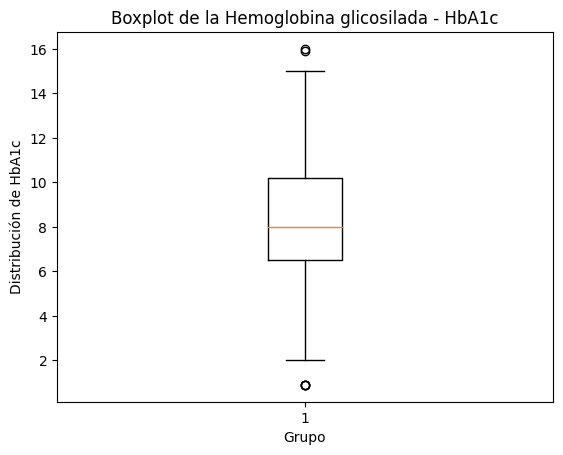

In [47]:
plt.boxplot(df_1numericas_importantes['HbA1c'])
plt.title('Boxplot de la Hemoglobina glicosilada - HbA1c')
plt.xlabel('Grupo')
plt.ylabel('Distribución de HbA1c')
plt.show()



*   Chol



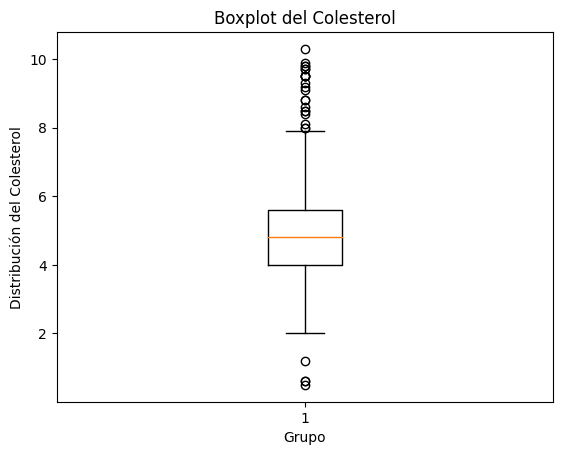

In [49]:
plt.boxplot(df_1numericas_importantes['Chol'])
plt.title('Boxplot del Colesterol')
plt.xlabel('Grupo')
plt.ylabel('Distribución del Colesterol')
plt.show()



*   TG



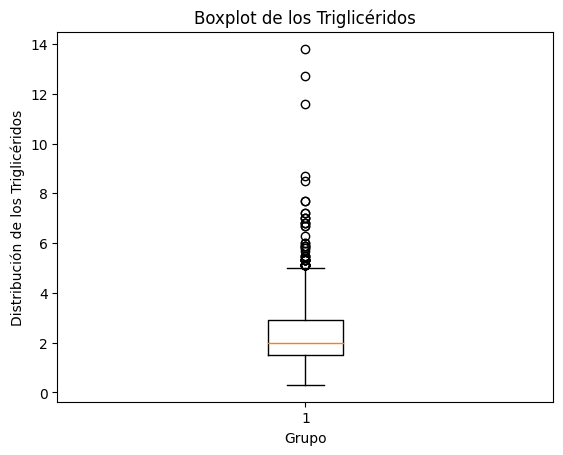

In [50]:
plt.boxplot(df_1numericas_importantes['TG'])
plt.title('Boxplot de los Triglicéridos')
plt.xlabel('Grupo')
plt.ylabel('Distribución de los Triglicéridos')
plt.show()



*   HDL



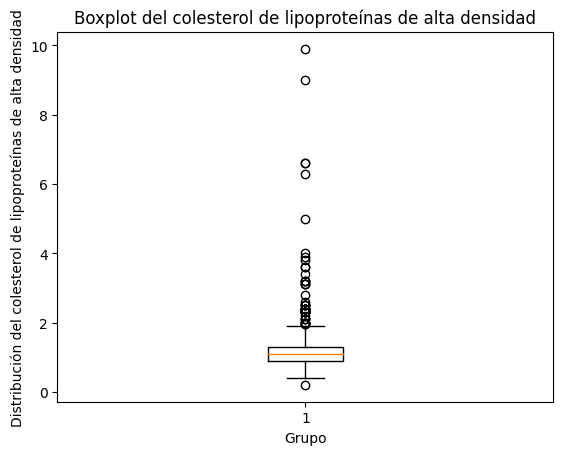

In [52]:
plt.boxplot(df_1numericas_importantes['HDL'])
plt.title('Boxplot del colesterol de lipoproteínas de alta densidad')
plt.xlabel('Grupo')
plt.ylabel('Distribución del colesterol de lipoproteínas de alta densidad')
plt.show()



*   LDL



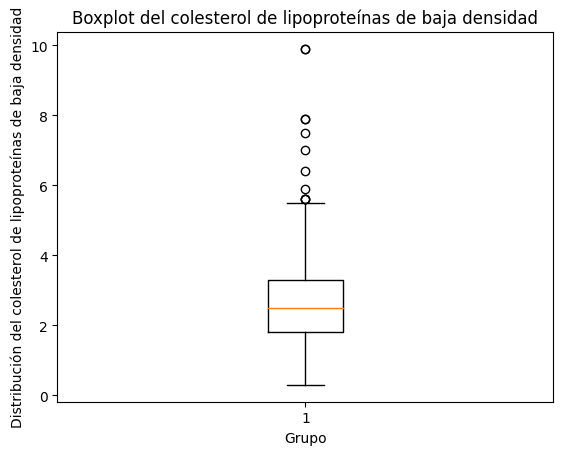

In [53]:
plt.boxplot(df_1numericas_importantes['LDL'])
plt.title('Boxplot del colesterol de lipoproteínas de baja densidad')
plt.xlabel('Grupo')
plt.ylabel('Distribución del colesterol de lipoproteínas de baja densidad')
plt.show()



*   VLDL



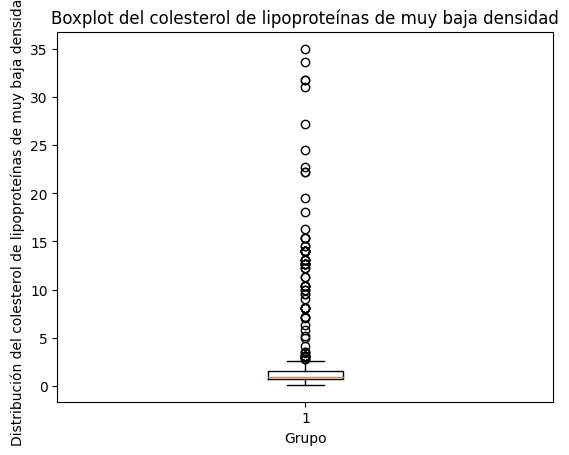

In [54]:
plt.boxplot(df_1numericas_importantes['VLDL'])
plt.title('Boxplot del colesterol de lipoproteínas de muy baja densidad')
plt.xlabel('Grupo')
plt.ylabel('Distribución del colesterol de lipoproteínas de muy baja densidad')
plt.show()



*   BMI



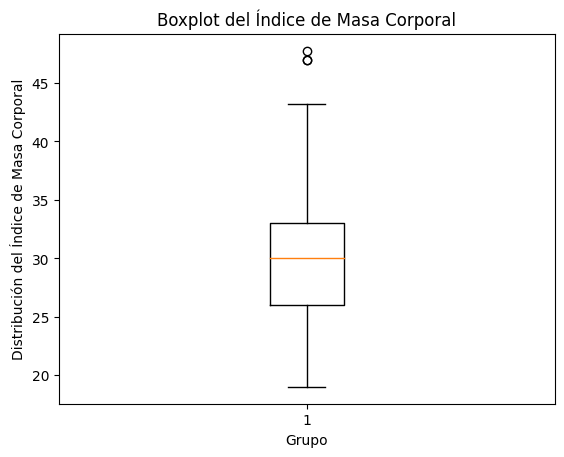

In [55]:
plt.boxplot(df_1numericas_importantes['BMI'])
plt.title('Boxplot del Índice de Masa Corporal')
plt.xlabel('Grupo')
plt.ylabel('Distribución del Índice de Masa Corporal')
plt.show()

Como conclusión del estudio de ouliers, aunque en todas las variables existen valores atípicos, son valores que son reales y válidos, ya que es posible que una persona posea esos valores, por lo cual, los datos son significativos y no se eliminarán, porque eliminarlos supondría pérdida de información relevante y mayor probabilidad de desarrollar resultados erróneos.

**Cálculo de la matriz de correlación para descubrir cuales son las variables más relevantes.**

In [56]:
matriz_correlacion = df_1numericas_importantes.corr()
print(matriz_correlacion)

            AGE      Urea        Cr     HbA1c      Chol        TG       HDL  \
AGE    1.000000  0.105583  0.053491  0.383794  0.047132  0.147881 -0.018469   
Urea   0.105583  1.000000  0.624280 -0.023666  0.001705  0.040996 -0.037027   
Cr     0.053491  0.624280  1.000000 -0.036739 -0.004819  0.056394 -0.023434   
HbA1c  0.383794 -0.023666 -0.036739  1.000000  0.174570  0.219076  0.028259   
Chol   0.047132  0.001705 -0.004819  0.174570  1.000000  0.325291  0.102257   
TG     0.147881  0.040996  0.056394  0.219076  0.325291  1.000000 -0.082824   
HDL   -0.018469 -0.037027 -0.023434  0.028259  0.102257 -0.082824  1.000000   
LDL    0.018115 -0.007334  0.039947  0.010239  0.416982  0.015617 -0.142589   
VLDL  -0.087377 -0.011205  0.009812  0.073154  0.075649  0.144686 -0.059482   
BMI    0.383896  0.045631  0.056204  0.412127  0.005752  0.111704  0.071276   

            LDL      VLDL       BMI  
AGE    0.018115 -0.087377  0.383896  
Urea  -0.007334 -0.011205  0.045631  
Cr     0.039947 

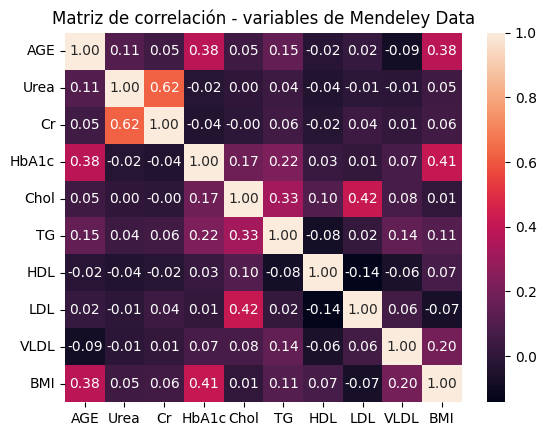

In [57]:
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f").set_title("Matriz de correlación - variables de Mendeley Data")
plt.show()

Las variables con mayor correlación positiva son:

*   Cr - Urea (0.62)
*   Chol - LDL (0.42)
*   HbA1c - BMI (0.41)
*   HbA1c - Age (0.38)
*   Age - BMI (0.38)
*   Chol - TG (0.33)
*   HbA1c - TG (0.22)


### 3.2.2. Tabla de contingencia de las variables categóricas CLASS y Gender.



*   En función de totales



In [58]:
tabla_contingencia1 = pd.crosstab(df_1['CLASS'], df_1['Gender'], margins=True)
print(tabla_contingencia1)

Gender    F    M  All
CLASS                
N        64   38  102
P        17   36   53
Y       354  490  844
All     435  564  999




*   Porcentajes según el total



In [59]:
tabla_contingencia1_porcentajes = pd.crosstab(df_1['CLASS'], df_1['Gender'], normalize='index')
print(tabla_contingencia1_porcentajes*100)

Gender          F          M
CLASS                       
N       62.745098  37.254902
P       32.075472  67.924528
Y       41.943128  58.056872


### 3.2.3. Prueba de chi-cuadrado entre las variables categóricas.

In [60]:
chi2, pvalue, dof, expected = stats.chi2_contingency(df_1.groupby(["CLASS", "Gender"]).size().unstack())
print('Resultados de la prueba de chi-cuadrado:', end='\n\n')
print('Valor de chi2:',chi2, end='\n\n')
print('Valor de p-value:',pvalue, end='\n\n')
print('Valor de dof:',dof, end='\n\n')
print('Tabla expected:')
print(expected)

Resultados de la prueba de chi-cuadrado:

Valor de chi2: 19.01283229838622

Valor de p-value: 7.437310680143284e-05

Valor de dof: 2

Tabla expected:
[[ 44.41441441  57.58558559]
 [ 23.07807808  29.92192192]
 [367.50750751 476.49249249]]


## **4. Análisis de la segunda base de datos - excel**

Como unidad de medida seguramente se usó mg/dl (miligramos por decilitro), que es la unidad de medida usada en Estados Unidos, menos en la medida de la presión arterial sistólica y diastólica que está medida en mm Hg (milimetros de mercurio). Además, height, waist y hip está en inches y weight en pounds que son las unidades de medida estadounidenses.

### 4.1. Observación de la Cabecera de la base de datos.

In [61]:
df_2.head()

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,49.0,57.0,180.0
3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,NaN,NaN,33.0,38.0,480.0
4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,NaN,NaN,44.0,41.0,300.0


### 4.2. Visualización de las columnas y los tipos de datos.

In [62]:
df_2.columns

Index(['id', 'chol', 'stab.glu', 'hdl', 'ratio', 'glyhb', 'location', 'age',
       'gender', 'height', 'weight', 'frame', 'bp.1s', 'bp.1d', 'bp.2s',
       'bp.2d', 'waist', 'hip', 'time.ppn'],
      dtype='object')

In [63]:
df_2.dtypes

id            int64
chol        float64
stab.glu      int64
hdl         float64
ratio       float64
glyhb       float64
location     object
age           int64
gender       object
height      float64
weight      float64
frame        object
bp.1s       float64
bp.1d       float64
bp.2s       float64
bp.2d       float64
waist       float64
hip         float64
time.ppn    float64
dtype: object

**DESCRIPCIÓN DE CADA VARIABLE**
<br>
**id:** número identificativo del paciente
<br>
**chol:** niveles totales de colesterol. Medida: mg/dl
<br>
**stab.glu:** glucosa estabilizada. Medida: mg/dl
<br>
**hdl:** (High Density Lipoproteins) niveles de colesterol de lipoproteínas de alta densidad. Medida: mg/dl
<br>
**ratio:** colesterol/HDL ratio. Medida: mg/dl
<br>
**glyhb:** niveles de hemoglobina glicosilada. Medida: %
<br>
**location:** localización del indivíduo (Buckingam, Louisa)
<br>
**age:** edad del paciente. Medida: años
<br>
**gender:** género del paciente (Female/Male)
<br>
**height:** altura del paciente. Medida: inches
<br>
**weight:** peso del cliente. Medida: pounds
<br>
**frame:** talla de brazalete de tensiómetro. Medida: Small/Medium/Large
<br>
**bp.1s:** primera presión arterial sistólica. Medida: mm Hg
<br>
**bp.1d:** primera presión arterial diastólica. Medida: mm Hg
<br>
**bp.2s:** segunda presión arterial sistólica. Medida: mm Hg
<br>
**bp.2d:** segunda presión arterial diastólica. Medida: mm Hg
<br>
**waist:** medida de la cintura. Medida: inches
<br>
**hip:** medida de la cadera. Medida: inches
<br>
**time.ppn:** tiempo postrpandial en el cual se extrajeron las muestras. Medida: minutos

### 4.3. Número de observaciones totales en el dataframe.

In [64]:
num_observaciones_df_2 = len(df_2)
print(num_observaciones_df_2)

403


### 4.4. Búsqueda de valores nulos y NA. Y cambio de unidades de medida a las internacionales.

### 4.4.1 Búsqueda de nulos y NA.

In [65]:
df_2.isnull().sum()

id            0
chol          1
stab.glu      0
hdl           1
ratio         1
glyhb        13
location      0
age           0
gender        0
height        5
weight        1
frame        12
bp.1s         5
bp.1d         5
bp.2s       262
bp.2d       262
waist         2
hip           2
time.ppn      3
dtype: int64

Existen NA en las siguientes variables:


*   chol - 1
*   hdl - 1
*   ratio - 1
*   glyhb - 13
*   height - 5
*   weight - 1
*   frame - 12
*   bp.1s - 5
*   bp.1d - 5
*   bp.2s - 262
*   bp.2d - 262
*   waist - 2
*   hip - 2
*   time.ppn - 3




**Eliminación de columnas**

Se procederá a eliminar:
  

*   **frame** también se eliminará ya que la talla del barzalete no aporta valor al estudio.
*   **bp.2s** y **bp.2d** también se procederá a eliminarlas, ya que tienen valores NA en más de la mitad de observaciones.
*   **time.ppn** también se eliminará, ya que no aporta valor.

In [66]:
df_2 = df_2.drop("frame", axis=1)
df_2 = df_2.drop("bp.2s", axis=1)
df_2 = df_2.drop("bp.2d", axis=1)
df_2 = df_2.drop("time.ppn", axis=1)
print(df_2)

        id   chol  stab.glu   hdl  ratio      glyhb    location  age  gender  \
0     1000  203.0        82  56.0    3.6   4.310000  Buckingham   46  female   
1     1001  165.0        97  24.0    6.9   4.440000  Buckingham   29  female   
2     1002  228.0        92  37.0    6.2   4.640000  Buckingham   58  female   
3     1003   78.0        93  12.0    6.5   4.630000  Buckingham   67    male   
4     1005  249.0        90  28.0    8.9   7.720000  Buckingham   64    male   
..     ...    ...       ...   ...    ...        ...         ...  ...     ...   
398  41506  296.0       369  46.0    6.4  16.110001      Louisa   53    male   
399  41507  284.0        89  54.0    5.3   4.390000      Louisa   51  female   
400  41510  194.0       269  38.0    5.1  13.630000      Louisa   29  female   
401  41752  199.0        76  52.0    3.8   4.490000      Louisa   41  female   
402  41756  159.0        88  79.0    2.0        NaN      Louisa   68  female   

     height  weight  bp.1s  bp.1d  wais

**Búsqueda de los NA por variable para ver dónde se encuentran para luego decidir el método de eliminación de NA**



*   chol - hdl y ratio tienen 1 NA en la misma observación. Por lo cual, se procederá a eliminar esta observación.



In [67]:
df_2.loc[df_2['chol'].isna()]

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,bp.1s,bp.1d,waist,hip
27,1281,NaN,74,NaN,NaN,4.28,Buckingham,48,male,68.0,100.0,120.0,85.0,27.0,33.0


In [68]:
df_2 = df_2.drop(27)



*   glyhb - como existen 13 NA se procederá a imputar estos valores mediante el método de estimación.



In [69]:
df_2.loc[df_2['glyhb'].isna()]

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,bp.1s,bp.1d,waist,hip
43,1326,262.0,84,38.0,6.9,NaN,Buckingham,43,male,75.0,253.0,124.0,80.0,43.0,49.0
59,2774,218.0,88,39.0,5.6,NaN,Buckingham,44,female,66.0,191.0,138.0,79.0,40.0,45.0
64,2784,234.0,80,63.0,3.7,NaN,Buckingham,31,male,70.0,165.0,121.0,71.0,35.0,39.0
109,4808,218.0,80,71.0,3.1,NaN,Buckingham,68,male,70.0,170.0,130.0,73.0,37.0,42.0
116,4826,231.0,105,61.0,3.8,NaN,Buckingham,58,female,63.0,230.0,141.0,99.0,39.0,48.0
117,4827,217.0,78,48.0,4.5,NaN,Buckingham,53,female,63.0,158.0,139.0,79.0,33.0,40.0
192,15542,205.0,88,41.0,5.0,NaN,Louisa,57,male,66.0,171.0,132.0,82.0,37.0,40.0
217,15813,237.0,96,52.0,4.6,NaN,Buckingham,45,male,69.0,130.0,137.0,74.0,33.0,35.0
273,20258,226.0,68,83.0,2.7,NaN,Buckingham,49,female,63.0,128.0,121.0,75.0,31.0,36.0
326,20787,298.0,84,50.0,6.0,NaN,Buckingham,28,male,66.0,209.0,131.0,111.0,42.0,46.0


Se sustituirán los NA según el valor medio teniendo en cuenta edad y género. Para la edad se usarán estas franjas: 19-24 (jóvenes), 25-64 (adultos), 65 o más (mayores).

In [70]:
min_age = df_2['age'].min()
max_age = df_2['age'].max()
print("Edad mínima:", min_age)
print("Edad máxima:", max_age)

Edad mínima: 19
Edad máxima: 92


Cálculo de la hemoglobina glicosilada.

In [71]:
glyhb_medio_jovenes_mujer = df_2.query('gender == "female" & (age <= 24)')['glyhb'].dropna().mean()
glyhb_medio_jovenes_hombres = df_2.query('gender == "male" & (age <= 24)')['glyhb'].dropna().mean()
glyhb_medio_adultos_mujer = df_2.query('gender == "female" & (age >= 25 & age <= 64)')['glyhb'].dropna().mean()
glyhb_medio_adultos_hombres = df_2.query('gender == "male" & (age >= 25 & age <= 64)')['glyhb'].dropna().mean()
glyhb_medio_mayores_mujer = df_2.query('gender == "female" & (age >= 65)')['glyhb'].dropna().mean()
glyhb_medio_mayores_hombres = df_2.query('gender == "male" & (age >= 65)')['glyhb'].dropna().mean()

print('Media de hemoglobina glicosilada de mujeres entre 19-24 años:', glyhb_medio_jovenes_mujer)
print('Media de hemoglobina glicosilada de hombres entre 19-24 años:', glyhb_medio_jovenes_hombres)
print('Media de hemoglobina glicosilada de mujeres entre 25-64 años:', glyhb_medio_adultos_mujer)
print('Media de hemoglobina glicosilada de hombres entre 25-64 años:', glyhb_medio_adultos_hombres)
print('Media de hemoglobina glicosilada de mujeres mayores de 65 años:', glyhb_medio_mayores_mujer)
print('Media de hemoglobina glicosilada de hombres mayores de 65 años:', glyhb_medio_mayores_hombres)

Media de hemoglobina glicosilada de mujeres entre 19-24 años: 4.4065217660821006
Media de hemoglobina glicosilada de hombres entre 19-24 años: 4.658750057220459
Media de hemoglobina glicosilada de mujeres entre 25-64 años: 5.496820804011615
Media de hemoglobina glicosilada de hombres entre 25-64 años: 5.621869926530171
Media de hemoglobina glicosilada de mujeres mayores de 65 años: 6.262812532484531
Media de hemoglobina glicosilada de hombres mayores de 65 años: 6.4753333250681555


Sustitución de valores NA en la variable glyhb.

In [72]:
def sustituir_na(row):
    retorno = row['glyhb']
    if row['age'] < 25 and row['gender'] == 'female' and pd.isna(row['glyhb']):
        retorno = glyhb_medio_jovenes_mujer
    elif row['age'] < 25 and row['gender'] == 'male' and pd.isna(row['glyhb']):
        retorno = glyhb_medio_jovenes_hombres
    elif row['age'] > 24 and row['age'] < 65 and row['gender'] == 'female' and pd.isna(row['glyhb']):
        retorno = glyhb_medio_adultos_mujer
    elif row['age'] > 24 and row['age'] < 65 and row['gender'] == 'male' and pd.isna(row['glyhb']):
        retorno =  glyhb_medio_adultos_hombres
    elif row['age'] > 64 and row['gender'] == 'female' and pd.isna(row['glyhb']):
        retorno =  glyhb_medio_mayores_mujer
    elif row['age'] > 64 and row['gender'] == 'male' and pd.isna(row['glyhb']):
        retorno = glyhb_medio_mayores_hombres
    return retorno
df_2['glyhb'] = df_2.apply(sustituir_na, axis=1)



*   height - como existen 5 observaciones con NA, se procederá a imputar estos valores mediante el método de estimación.



In [73]:
df_2.loc[df_2['height'].isna()]

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,bp.1s,bp.1d,waist,hip
63,2780,145.0,85,29.0,5.0,3.99,Buckingham,38,female,NaN,125.0,NaN,NaN,31.0,35.0
86,4760,218.0,182,54.0,4.0,10.55,Louisa,51,female,NaN,215.0,139.0,69.0,42.0,53.0
195,15757,173.0,83,37.0,4.7,4.31,Buckingham,40,female,NaN,130.0,122.0,76.0,37.0,38.0
231,16016,214.0,87,35.0,6.1,5.38,Buckingham,44,female,NaN,190.0,140.0,75.0,38.0,44.0
317,20762,300.0,65,59.0,5.1,4.56,Louisa,34,female,NaN,160.0,120.0,60.0,40.0,47.0


El método de sustitución de los valores NA de height será la media de la columna, ya que la altura es una variable que no depende de ninguna de las que se encuentran en el dataframe.

In [74]:
mean_height = df_2['height'].dropna().mean()
print(mean_height)

66.01511335012594


In [75]:
df_2['height'].fillna(mean_height, inplace=True)



*   bp.1s - bp.1d tienen 5 NA que coinciden en número de observaciones. Los NA se sustituyen por la media.



In [76]:
df_2.loc[df_2['bp.1s'].isna()]

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,bp.1s,bp.1d,waist,hip
7,1015,227.0,75,44.0,5.2,3.94,Buckingham,37,male,59.000000,170.0,NaN,NaN,34.0,39.0
13,1031,183.0,79,46.0,4.0,4.59,Louisa,40,female,59.000000,165.0,NaN,NaN,37.0,43.0
37,1314,190.0,107,32.0,5.9,3.56,Buckingham,46,male,72.000000,205.0,NaN,NaN,46.0,49.0
63,2780,145.0,85,29.0,5.0,3.99,Buckingham,38,female,66.015113,125.0,NaN,NaN,31.0,35.0
215,15805,197.0,92,46.0,4.3,4.75,Buckingham,36,female,64.000000,136.0,NaN,NaN,32.0,37.0


In [77]:
mean_bp_1s = df_2['bp.1s'].dropna().mean()
print(mean_bp_1s)

136.9471032745592


In [78]:
df_2['bp.1s'].fillna(mean_bp_1s, inplace=True)

In [79]:
mean_bp_1d = df_2['bp.1d'].dropna().mean()
print(mean_bp_1d)

83.31738035264483


In [80]:
df_2['bp.1d'].fillna(mean_bp_1d, inplace=True)



*   waist - hip tienen 2 NA en las mismas observaciones. Se sustituyen sus valores por la media de cada columna.



In [81]:
df_2.loc[df_2['waist'].isna()]

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,bp.1s,bp.1d,waist,hip
336,21321,158.0,74,64.0,2.5,2.73,Louisa,30,female,62.0,142.0,108.0,68.0,NaN,NaN
393,41253,192.0,85,69.0,2.8,4.38,Louisa,51,male,65.0,146.0,130.0,110.0,NaN,NaN


In [82]:
mean_waist = df_2['waist'].dropna().mean()
print(mean_waist)

37.9275


In [83]:
df_2['waist'].fillna(mean_waist, inplace=True)

In [84]:
mean_hip = df_2['hip'].dropna().mean()
print(mean_hip)

43.065


In [85]:
df_2['hip'].fillna(mean_hip, inplace=True)



*   weight



Tiene un NA y se elimina la observación.

In [86]:
df_2.loc[df_2['weight'].isna()]

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,bp.1s,bp.1d,waist,hip
161,15012,115.0,239,36.0,3.2,13.6,Louisa,58,male,69.0,NaN,125.0,69.0,30.0,37.0


In [87]:
df_2 = df_2.drop(161)

**Comprobación de que se han elimiando los NA.**

In [88]:
df_2.isnull().sum()

id          0
chol        0
stab.glu    0
hdl         0
ratio       0
glyhb       0
location    0
age         0
gender      0
height      0
weight      0
bp.1s       0
bp.1d       0
waist       0
hip         0
dtype: int64

In [89]:
df_2.eq(0).sum()

id          0
chol        0
stab.glu    0
hdl         0
ratio       0
glyhb       0
location    0
age         0
gender      0
height      0
weight      0
bp.1s       0
bp.1d       0
waist       0
hip         0
dtype: int64

No existen valores nulos.

Número de observaciones resultantes después de eliminar NA.

In [90]:
num_observaciones_df_2_final = len(df_2)
print(num_observaciones_df_2_final)

401


### 4.4.2. Cambio de unidades de medidas a las internacionales.

Como las unidades de medidas no son las internacionales, se transformarán las variables correspondientes a las unidades internacionales:


**1.   De inches a metros - Se divide el dato entre 39.3701**

  *   height

**2.   De pounds a kg - Se divide el dato entre 2.205**

  *   weight

**3.   De mg/dl a mmol/L. Se usará mmol/L porque es una unidad más pequeña que mg/dl, por lo cual, habrá mayor precisión**
  *   chol - Se multiplica el dato por 0.02586
  *   stab.glu - Se divide el dato por 18
  *   hdl - Se multiplica el dato por 0.02586

**4.   De inches a centimétros - Se multiplica el dato por 2.54**
  *   waist
  *   hip



**De inches a metros**

In [91]:
df_2['height'] = df_2['height'] / 39.37

**De pounds a kg**

In [92]:
df_2['weight'] = df_2['weight'] / 2.205

**De mg/L a mmol/L**

In [93]:
df_2['chol'] = df_2['chol'] * 0.02586
df_2['stab.glu'] = df_2['stab.glu'] / 18
df_2['hdl'] = df_2['hdl'] * 0.02586
df_2['ratio'] = df_2['chol'] / df_2['hdl']

**De inches a centímetros**

In [94]:
df_2['waist'] = df_2['waist'] * 2.54
df_2['hip'] = df_2['hip'] * 2.54

Se observa que se han aplicado los cambios.

In [95]:
df_2.head()

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,bp.1s,bp.1d,waist,hip
0,1000,5.24958,4.555556,1.44816,3.625000,4.31,Buckingham,46,female,1.574803,54.875283,118.0,59.0,73.66,96.52
1,1001,4.26690,5.388889,0.62064,6.875000,4.44,Buckingham,29,female,1.625603,98.866213,112.0,68.0,116.84,121.92
2,1002,5.89608,5.111111,0.95682,6.162162,4.64,Buckingham,58,female,1.549403,116.099773,190.0,92.0,124.46,144.78
3,1003,2.01708,5.166667,0.31032,6.500000,4.63,Buckingham,67,male,1.701803,53.968254,110.0,50.0,83.82,96.52
4,1005,6.43914,5.000000,0.72408,8.892857,7.72,Buckingham,64,male,1.727203,82.993197,138.0,80.0,111.76,104.14


## **5. Estudio de las variables según el tipo**

5.1. Variables Numéricas: Se seleccionan las variables numéricas.

In [96]:
df_2numericas = df_2.select_dtypes(include=['number'])
print(df_2numericas)

        id     chol   stab.glu      hdl     ratio      glyhb  age    height  \
0     1000  5.24958   4.555556  1.44816  3.625000   4.310000   46  1.574803   
1     1001  4.26690   5.388889  0.62064  6.875000   4.440000   29  1.625603   
2     1002  5.89608   5.111111  0.95682  6.162162   4.640000   58  1.549403   
3     1003  2.01708   5.166667  0.31032  6.500000   4.630000   67  1.701803   
4     1005  6.43914   5.000000  0.72408  8.892857   7.720000   64  1.727203   
..     ...      ...        ...      ...       ...        ...  ...       ...   
398  41506  7.65456  20.500000  1.18956  6.434783  16.110001   53  1.752604   
399  41507  7.34424   4.944444  1.39644  5.259259   4.390000   51  1.600203   
400  41510  5.01684  14.944444  0.98268  5.105263  13.630000   29  1.752604   
401  41752  5.14614   4.222222  1.34472  3.826923   4.490000   41  1.600203   
402  41756  4.11174   4.888889  2.04294  2.012658   6.262813   68  1.625603   

         weight  bp.1s  bp.1d   waist     hip  
0  

Se excluye la variable id  porque no contiene información significativa para la realización de la predicción.

In [97]:
df_2numericas_importantes = df_2numericas.drop(['id'], axis=1)
print(df_2numericas_importantes)

        chol   stab.glu      hdl     ratio      glyhb  age    height  \
0    5.24958   4.555556  1.44816  3.625000   4.310000   46  1.574803   
1    4.26690   5.388889  0.62064  6.875000   4.440000   29  1.625603   
2    5.89608   5.111111  0.95682  6.162162   4.640000   58  1.549403   
3    2.01708   5.166667  0.31032  6.500000   4.630000   67  1.701803   
4    6.43914   5.000000  0.72408  8.892857   7.720000   64  1.727203   
..       ...        ...      ...       ...        ...  ...       ...   
398  7.65456  20.500000  1.18956  6.434783  16.110001   53  1.752604   
399  7.34424   4.944444  1.39644  5.259259   4.390000   51  1.600203   
400  5.01684  14.944444  0.98268  5.105263  13.630000   29  1.752604   
401  5.14614   4.222222  1.34472  3.826923   4.490000   41  1.600203   
402  4.11174   4.888889  2.04294  2.012658   6.262813   68  1.625603   

         weight  bp.1s  bp.1d   waist     hip  
0     54.875283  118.0   59.0   73.66   96.52  
1     98.866213  112.0   68.0  116.84  

### 5.1.1. Estudio de estadísticos importantes.

In [98]:
df_2numericas_importantes.describe()

,chol,stab.glu,hdl,ratio,glyhb,age,height,weight,bp.1s,bp.1d,waist,hip
count,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000
mean,5.380879,5.912441,1.305446,4.529213,5.576268,46.820449,1.676598,80.628361,136.976897,83.353085,96.386064,109.423517
std,1.144503,2.931686,0.446578,1.726670,2.174687,16.343429,0.099052,18.233035,22.631880,13.518923,14.451180,14.290426
min,2.017080,2.666667,0.310320,1.487179,2.680000,19.000000,1.320803,44.897959,90.000000,48.000000,66.040000,76.200000
25%,4.628940,4.500000,0.982680,3.228571,4.390000,34.000000,1.600203,68.480726,122.000000,75.000000,86.360000,99.060000
50%,5.275440,4.944444,1.189560,4.282609,4.870000,45.000000,1.676403,78.458050,136.000000,82.000000,93.980000,106.680000
75%,5.947800,5.888889,1.525740,5.425000,5.621870,60.000000,1.752604,90.702948,146.000000,90.000000,104.140000,116.840000
max,11.455980,21.388889,3.103200,19.260870,16.110001,92.000000,1.930404,147.392290,250.000000,124.000000,142.240000,162.560000


### 5.1.2. Realización de gráficos para descubrir tendencias en los datos.

**Gráficos de frecuencia de las variables mediante la realización de histogramas.**



*   chol



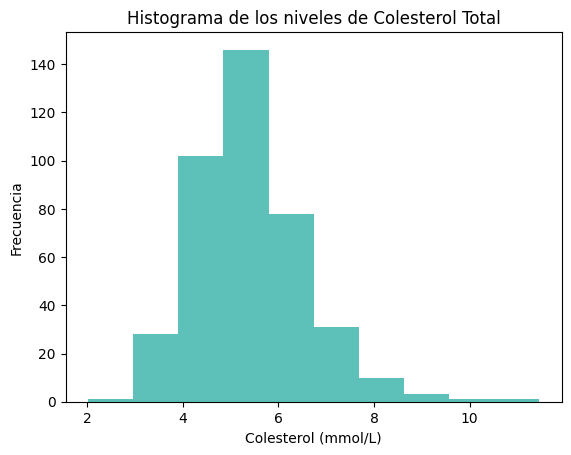

In [99]:
plt.hist(df_2numericas_importantes['chol'], color='#5dc1b9')
plt.title("Histograma de los niveles de Colesterol Total")
plt.xlabel('Colesterol (mmol/L)')
plt.ylabel('Frecuencia')
plt.show()

Visualización del colesterol según los niveles de hemoglobina glicosilada que pertenece a diabéticos, prediabéticos y sin diabetes.

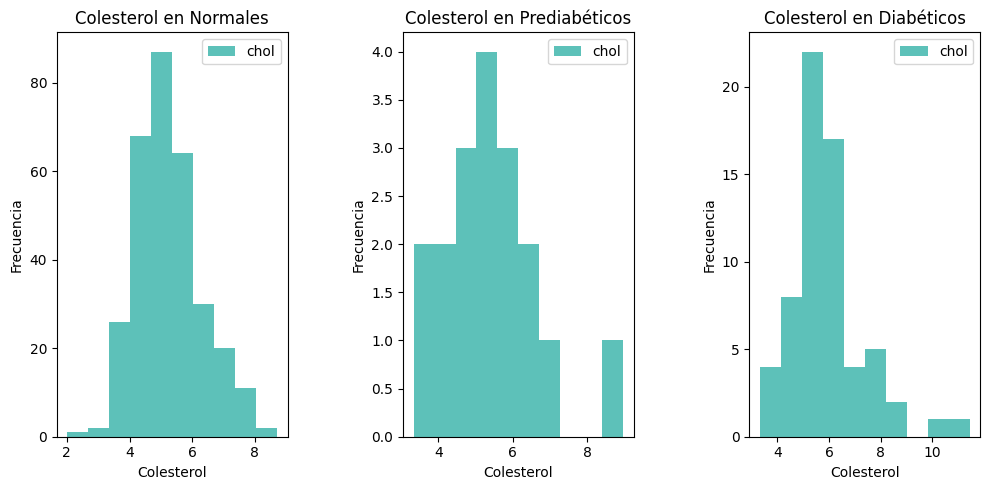

In [100]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
ax1 = plt.subplot(131)
plt.hist(df_2.query('glyhb < 5.7')['chol'], label='chol', color='#5dc1b9')
plt.title("Colesterol en Normales")
plt.xlabel('Colesterol')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

ax2 = plt.subplot(132)
plt.hist(df_2.query('glyhb >=5.7 & glyhb<= 6.4')['chol'], label='chol', color='#5dc1b9')
plt.title("Colesterol en Prediabéticos")
plt.xlabel('Colesterol')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()


ax3 = plt.subplot(133)
plt.title("Colesterol en Diabéticos")
plt.hist(df_2.query('glyhb >=6.5')['chol'],label='chol', color='#5dc1b9')
plt.xlabel('Colesterol')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

plt.subplots_adjust(hspace=0.5, wspace=0.5)



*   stab.glu



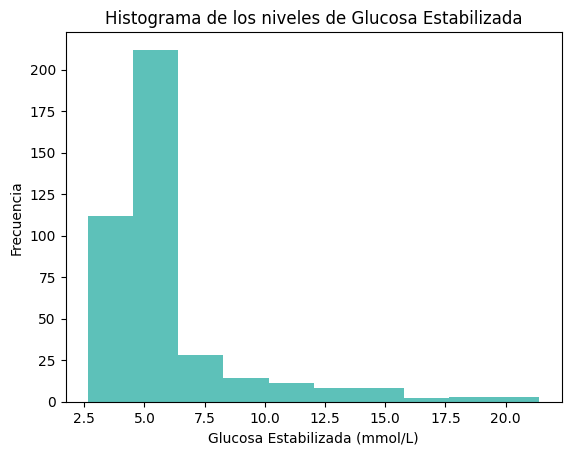

In [102]:
plt.hist(df_2numericas_importantes['stab.glu'], color='#5dc1b9')
plt.title("Histograma de los niveles de Glucosa Estabilizada")
plt.xlabel('Glucosa Estabilizada (mmol/L)')
plt.ylabel('Frecuencia')
plt.show()



*   hdl



Visualización de HDL según los niveles de hemoglobina glicosilada que pertenece a diabéticos, prediabéticos y sin diabetes.

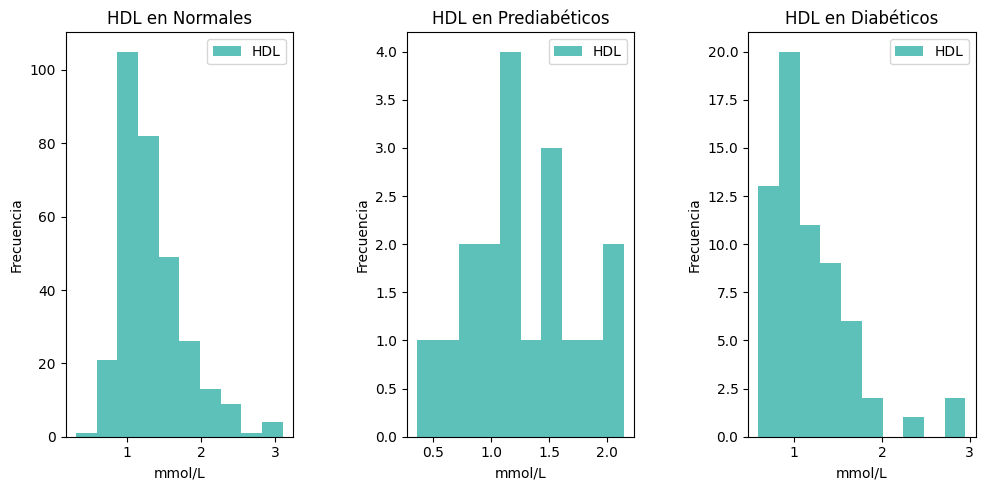

In [103]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
ax1 = plt.subplot(131)
plt.hist(df_2.query('glyhb < 5.7')['hdl'], label='HDL', color='#5dc1b9')
plt.title("HDL en Normales")
plt.xlabel('mmol/L')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

ax2 = plt.subplot(132)
plt.hist(df_2.query('glyhb >=5.7 & glyhb<= 6.4')['hdl'], label='HDL', color='#5dc1b9')
plt.title("HDL en Prediabéticos")
plt.xlabel('mmol/L')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()


ax3 = plt.subplot(133)
plt.title("HDL en Diabéticos")
plt.hist(df_2.query('glyhb >=6.5')['hdl'],label='HDL', color='#5dc1b9')
plt.xlabel('mmol/L')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

plt.subplots_adjust(hspace=0.5, wspace=0.5)



*   ratio



Visualización del ratio según los niveles de hemoglobina glicosilada que pertenece a diabéticos, prediabéticos y sin diabetes.

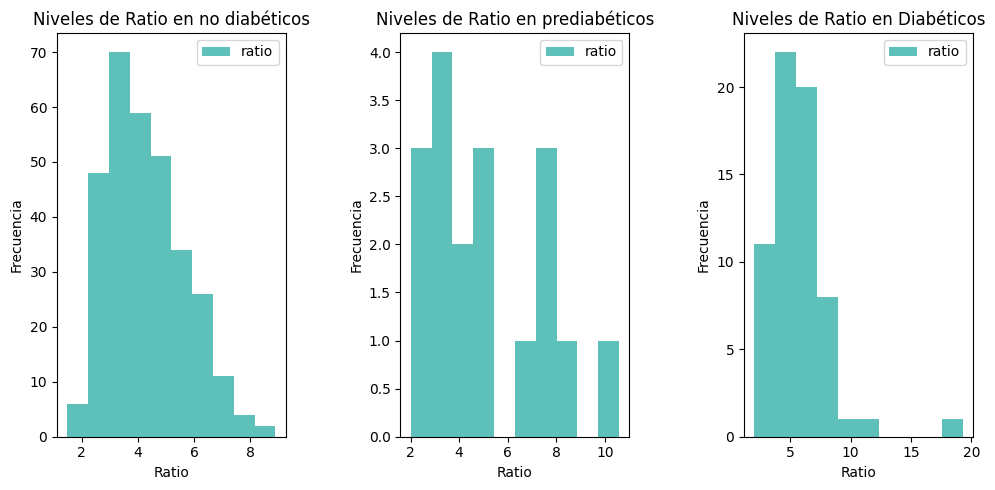

In [104]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
ax1 = plt.subplot(131)
plt.hist(df_2.query('glyhb < 5.7')['ratio'], label='ratio', color='#5dc1b9')
plt.title("Niveles de Ratio en no diabéticos")
plt.xlabel('Ratio')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

ax2 = plt.subplot(132)
plt.hist(df_2.query('glyhb >=5.7 & glyhb<= 6.4')['ratio'], label='ratio', color='#5dc1b9')
plt.title("Niveles de Ratio en prediabéticos")
plt.xlabel('Ratio')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()


ax3 = plt.subplot(133)
plt.title("Niveles de Ratio en Diabéticos")
plt.hist(df_2.query('glyhb >=6.5')['ratio'],label='ratio', color='#5dc1b9')
plt.xlabel('Ratio')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

plt.subplots_adjust(hspace=0.5, wspace=0.5)



*   glyhb



Visualización de según la hemoglobina glicosilada que pertenece a diabéticos, prediabéticos y sin diabetes.

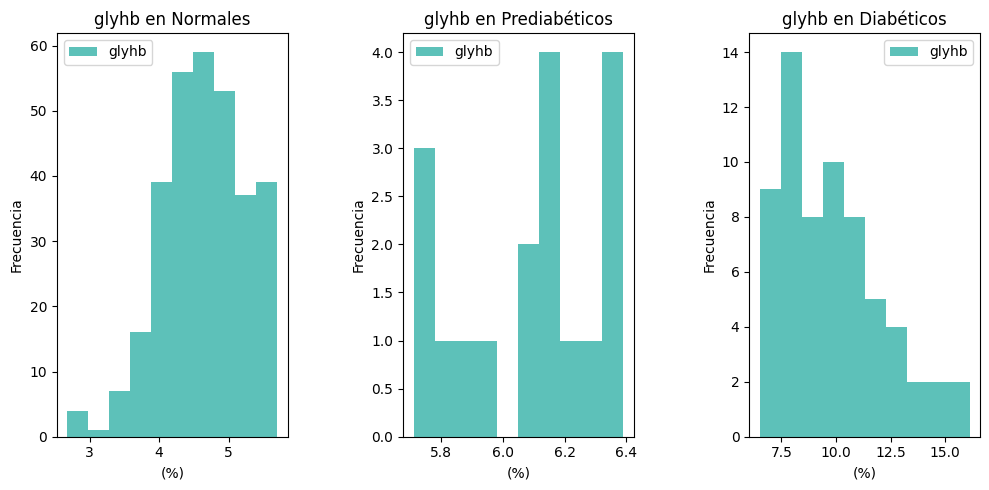

In [105]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
ax1 = plt.subplot(131)
plt.hist(df_2.query('glyhb < 5.7')['glyhb'], label='glyhb', color='#5dc1b9')
plt.title("glyhb en Normales")
plt.xlabel('(%)')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

ax2 = plt.subplot(132)
plt.hist(df_2.query('glyhb >=5.7 & glyhb<= 6.4')['glyhb'], label='glyhb', color='#5dc1b9')
plt.title("glyhb en Prediabéticos")
plt.xlabel('(%)')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()


ax3 = plt.subplot(133)
plt.title("glyhb en Diabéticos")
plt.hist(df_2.query('glyhb >=6.5')['glyhb'],label='glyhb', color='#5dc1b9')
plt.xlabel('(%)')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

plt.subplots_adjust(hspace=0.5, wspace=0.5)

Conteo de los no diabéticos, prediabéticos y diabéticos.

In [106]:
# Creación de grupos
grupos = df_2["glyhb"].groupby(pd.cut(df_2["glyhb"], [0,5.6,6.4,16.2]))

# Contar el número de filas en cada grupo
conteo_grupos = grupos.size()

# Imprimir el conteo de grupos
print(conteo_grupos)

glyhb
(0.0, 5.6]     297
(5.6, 6.4]      32
(6.4, 16.2]     72
Name: glyhb, dtype: int64




*   age



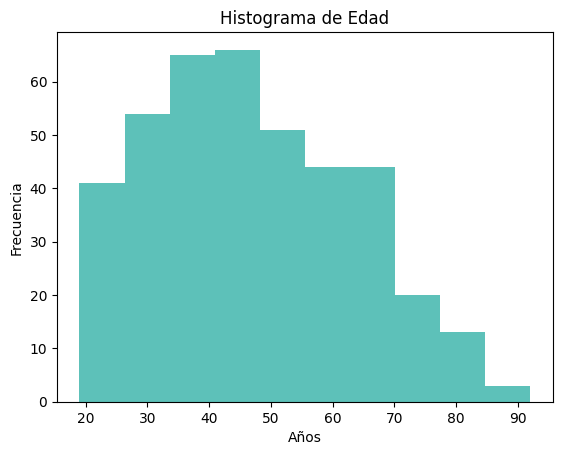

In [107]:
plt.hist(df_2numericas_importantes['age'], color='#5dc1b9')
plt.title("Histograma de Edad")
plt.xlabel('Años')
plt.ylabel('Frecuencia')
plt.show()

Visualización de la edad según los valores de hemoglobina glicosilada que pertenecen a sin diabetes, prediabéticos y diabéticos.

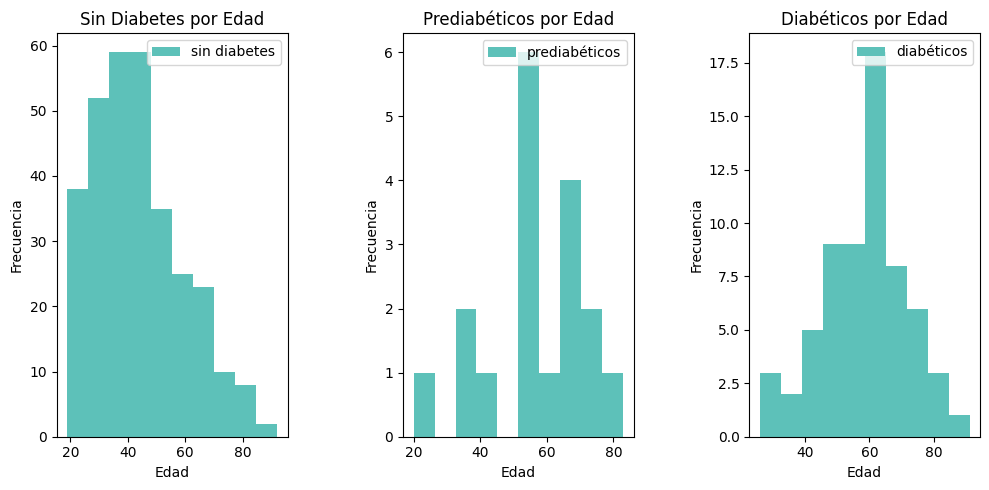

In [108]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
ax1 = plt.subplot(131)
plt.hist(df_2.query('glyhb < 5.7')['age'], label='sin diabetes', color='#5dc1b9')
plt.title("Sin Diabetes por Edad")
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

ax2 = plt.subplot(132)
plt.hist(df_2.query('glyhb >=5.7 & glyhb<= 6.4')['age'], label='prediabéticos', color='#5dc1b9')
plt.title("Prediabéticos por Edad")
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()


ax3 = plt.subplot(133)
plt.title("Diabéticos por Edad")
plt.hist(df_2.query('glyhb >=6.5')['age'],label='diabéticos', color='#5dc1b9')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

plt.subplots_adjust(hspace=0.5, wspace=0.5)



*   height



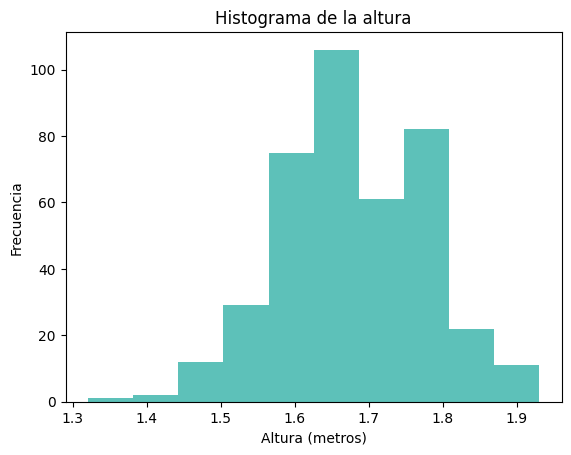

In [109]:
plt.hist(df_2numericas_importantes['height'], color='#5dc1b9')
plt.title("Histograma de la altura")
plt.xlabel('Altura (metros)')
plt.ylabel('Frecuencia')
plt.show()



*   weight



Visualización del peso según los valores de hemoglobina glicosilada que pertenecen a sin diabetes, prediabéticos y diabéticos.

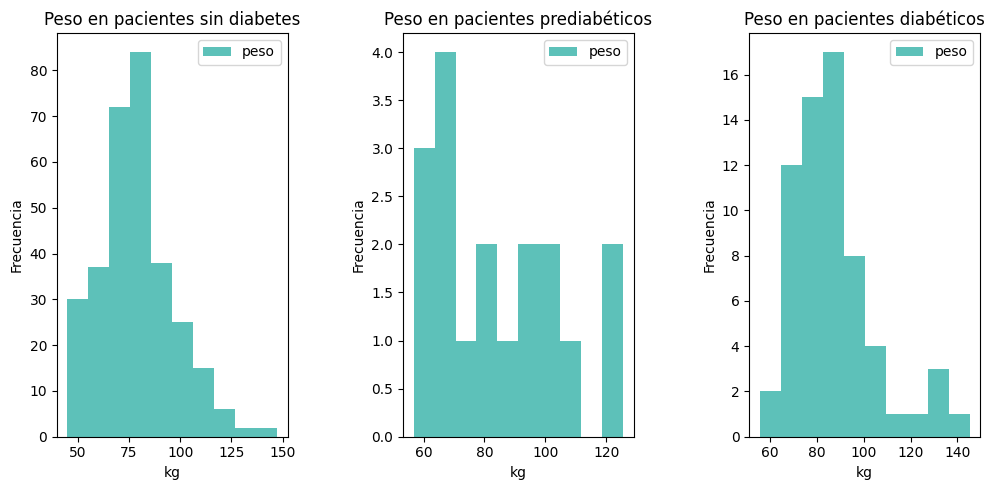

In [110]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
ax1 = plt.subplot(131)
plt.hist(df_2.query('glyhb < 5.7')['weight'], label='peso', color='#5dc1b9')
plt.title("Peso en pacientes sin diabetes")
plt.xlabel('kg')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

ax2 = plt.subplot(132)
plt.hist(df_2.query('glyhb >=5.7 & glyhb<= 6.4')['weight'], label='peso', color='#5dc1b9')
plt.title("Peso en pacientes prediabéticos")
plt.xlabel('kg')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()


ax3 = plt.subplot(133)
plt.title("Peso en pacientes diabéticos")
plt.hist(df_2.query('glyhb >=6.5')['weight'],label='peso', color='#5dc1b9')
plt.xlabel('kg')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

plt.subplots_adjust(hspace=0.5, wspace=0.5)

Visualización por género

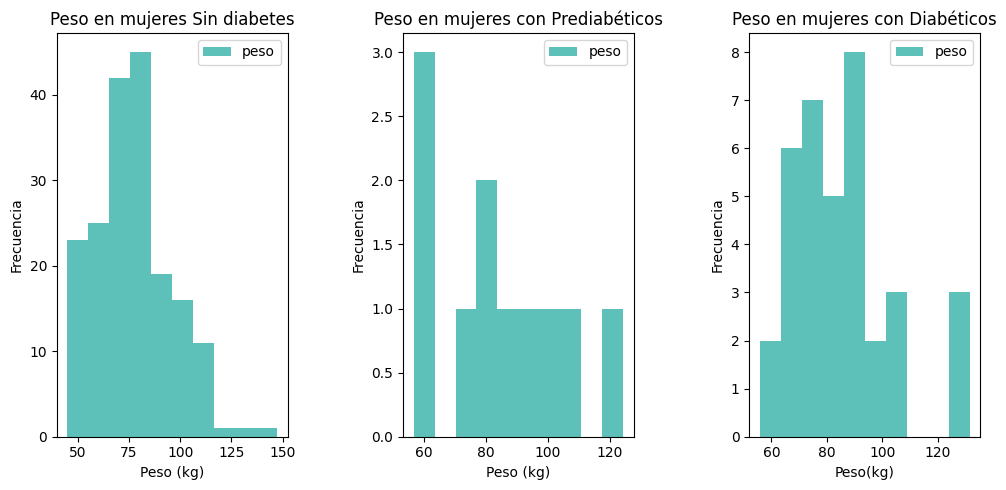

In [111]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
ax1 = plt.subplot(131)
plt.hist(df_2.query('glyhb < 5.7 & gender=="female"')['weight'], label='peso', color='#5dc1b9')
plt.title("Peso en mujeres Sin diabetes")
plt.xlabel('Peso (kg)')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

ax2 = plt.subplot(132)
plt.hist(df_2.query('glyhb >=5.7 & glyhb<= 6.4 & gender=="female"')['weight'], label='peso', color='#5dc1b9')
plt.title("Peso en mujeres con Prediabéticos")
plt.xlabel('Peso (kg)')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()


ax3 = plt.subplot(133)
plt.title("Peso en mujeres con Diabéticos")
plt.hist(df_2.query('glyhb >=6.5 & gender=="female"')['weight'],label='peso', color='#5dc1b9')
plt.xlabel('Peso(kg)')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

plt.subplots_adjust(hspace=0.5, wspace=0.5)

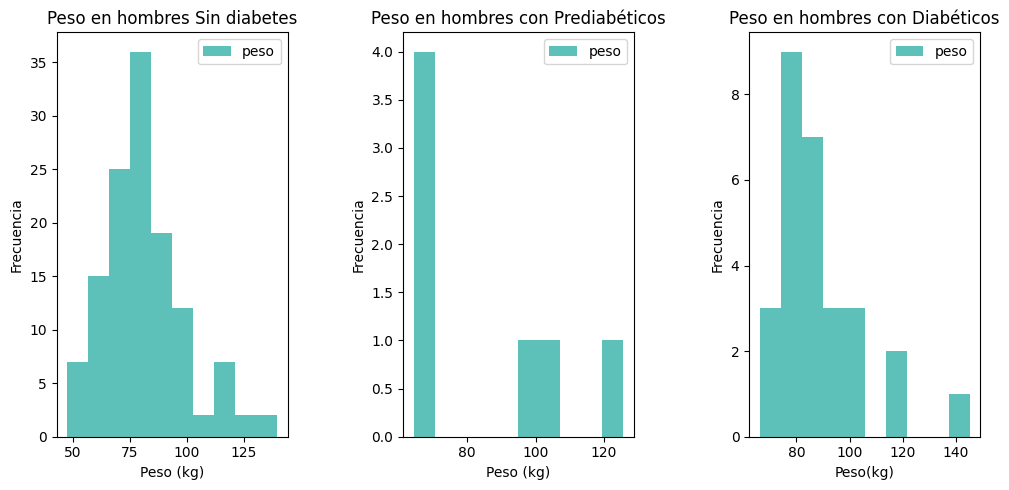

In [112]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
ax1 = plt.subplot(131)
plt.hist(df_2.query('glyhb < 5.7 & gender=="male"')['weight'], label='peso', color='#5dc1b9')
plt.title("Peso en hombres Sin diabetes")
plt.xlabel('Peso (kg)')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

ax2 = plt.subplot(132)
plt.hist(df_2.query('glyhb >=5.7 & glyhb<= 6.4 & gender=="male"')['weight'], label='peso', color='#5dc1b9')
plt.title("Peso en hombres con Prediabéticos")
plt.xlabel('Peso (kg)')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()


ax3 = plt.subplot(133)
plt.title("Peso en hombres con Diabéticos")
plt.hist(df_2.query('glyhb >=6.5 & gender=="male"')['weight'],label='peso', color='#5dc1b9')
plt.xlabel('Peso(kg)')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

plt.subplots_adjust(hspace=0.5, wspace=0.5)



*   bp.1s



Visualización de la presión arterial sistólica según los valores de hemoglobina glicosilada que pertenecen a sin diabetes, prediabéticos y diabéticos y edad.

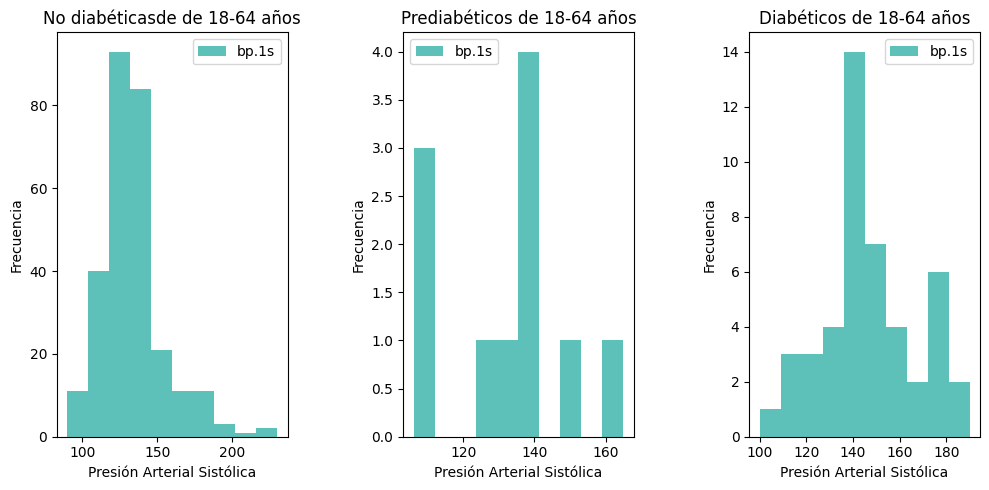

In [113]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
ax1 = plt.subplot(131)
plt.hist(df_2.query('glyhb < 5.7 & age >=18 & age <=64')['bp.1s'], label='bp.1s', color='#5dc1b9')
plt.title("No diabéticasde de 18-64 años")
plt.xlabel('Presión Arterial Sistólica')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

ax2 = plt.subplot(132)
plt.hist(df_2.query('glyhb >=5.7 & glyhb<= 6.4 & age >=18 & age <=64')['bp.1s'], label='bp.1s', color='#5dc1b9')
plt.title("Prediabéticos de 18-64 años")
plt.xlabel('Presión Arterial Sistólica')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()


ax3 = plt.subplot(133)
plt.title("Diabéticos de 18-64 años")
plt.hist(df_2.query('glyhb >=6.5 & age >=18 & age <=64')['bp.1s'],label='bp.1s', color='#5dc1b9')
plt.xlabel('Presión Arterial Sistólica')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

plt.subplots_adjust(hspace=0.5, wspace=0.5)

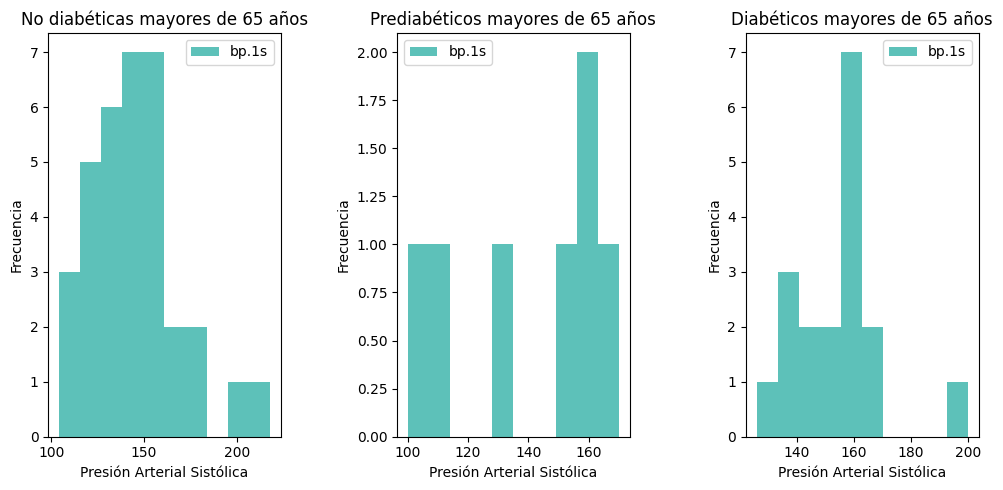

In [114]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
ax1 = plt.subplot(131)
plt.hist(df_2.query('glyhb < 5.7 & age >=65')['bp.1s'], label='bp.1s', color='#5dc1b9')
plt.title("No diabéticas mayores de 65 años")
plt.xlabel('Presión Arterial Sistólica')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

ax2 = plt.subplot(132)
plt.hist(df_2.query('glyhb >=5.7 & glyhb<= 6.4 & age >=65')['bp.1s'], label='bp.1s', color='#5dc1b9')
plt.title("Prediabéticos mayores de 65 años")
plt.xlabel('Presión Arterial Sistólica')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()


ax3 = plt.subplot(133)
plt.title("Diabéticos mayores de 65 años")
plt.hist(df_2.query('glyhb >=6.5 & age >=65')['bp.1s'],label='bp.1s', color='#5dc1b9')
plt.xlabel('Presión Arterial Sistólica')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

plt.subplots_adjust(hspace=0.5, wspace=0.5)

Nota: los valores normales se distribuyen de la siguiente manera:
*   Menores de 18 años: menos de 120 mm Hg
*   De 18 a 64 años: menos de 140 mm Hg
*   65 y mayores años: menos de 150 mm Hg






*   bp.1d



Visualización de la presión arterial diastólica según los valores de hemoglobina glicosilada que pertenecen a sin diabetes, prediabéticos y diabéticos y edad.

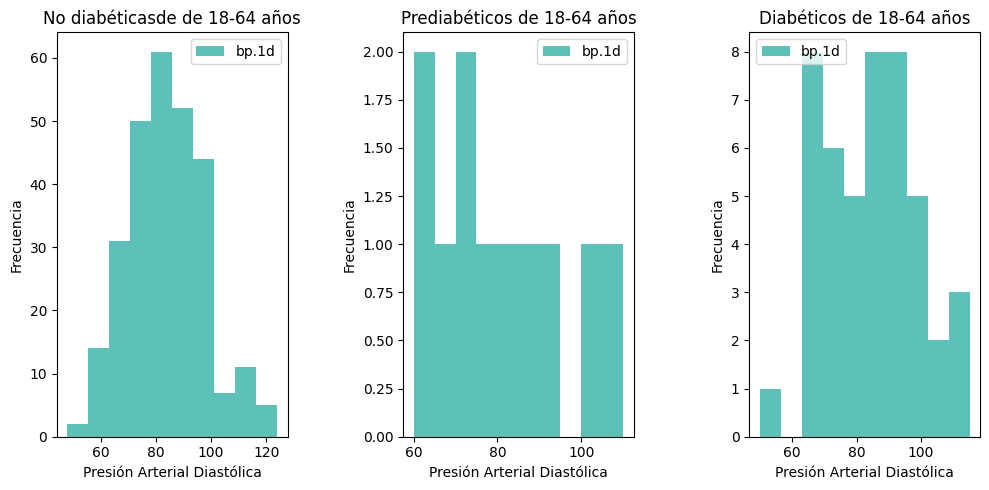

In [115]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
ax1 = plt.subplot(131)
plt.hist(df_2.query('glyhb < 5.7 & age >=18 & age <=64')['bp.1d'], label='bp.1d', color='#5dc1b9')
plt.title("No diabéticasde de 18-64 años")
plt.xlabel('Presión Arterial Diastólica')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

ax2 = plt.subplot(132)
plt.hist(df_2.query('glyhb >=5.7 & glyhb<= 6.4 & age >=18 & age <=64')['bp.1d'], label='bp.1d', color='#5dc1b9')
plt.title("Prediabéticos de 18-64 años")
plt.xlabel('Presión Arterial Diastólica')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()


ax3 = plt.subplot(133)
plt.title("Diabéticos de 18-64 años")
plt.hist(df_2.query('glyhb >=6.5 & age >=18 & age <=64')['bp.1d'],label='bp.1d', color='#5dc1b9')
plt.xlabel('Presión Arterial Diastólica')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

plt.subplots_adjust(hspace=0.5, wspace=0.5)

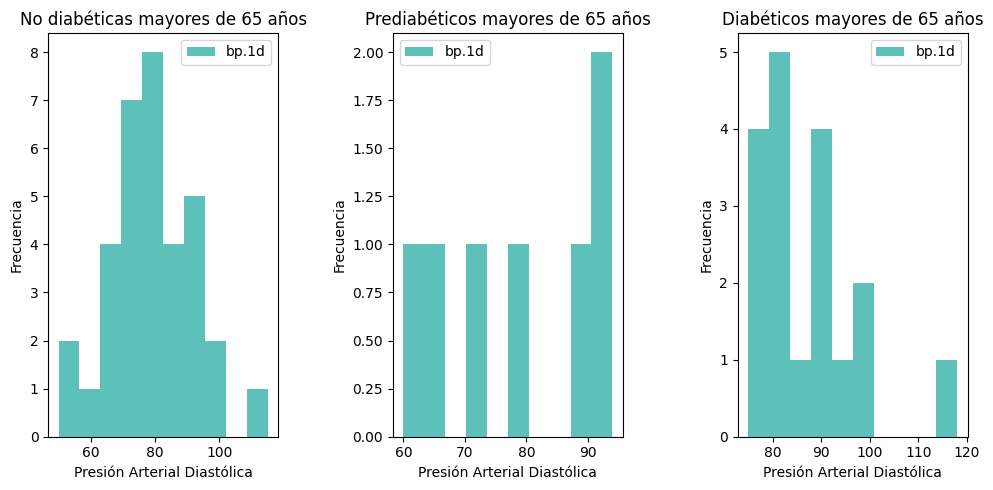

In [116]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
ax1 = plt.subplot(131)
plt.hist(df_2.query('glyhb < 5.7 & age >=65')['bp.1d'], label='bp.1d', color='#5dc1b9')
plt.title("No diabéticas mayores de 65 años")
plt.xlabel('Presión Arterial Diastólica')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

ax2 = plt.subplot(132)
plt.hist(df_2.query('glyhb >=5.7 & glyhb<= 6.4 & age >=65')['bp.1d'], label='bp.1d', color='#5dc1b9')
plt.title("Prediabéticos mayores de 65 años")
plt.xlabel('Presión Arterial Diastólica')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()


ax3 = plt.subplot(133)
plt.title("Diabéticos mayores de 65 años")
plt.hist(df_2.query('glyhb >=6.5 & age >=65')['bp.1d'],label='bp.1d', color='#5dc1b9')
plt.xlabel('Presión Arterial Diastólica')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

plt.subplots_adjust(hspace=0.5, wspace=0.5)

Nota:

*   Menores de 18 años: menos de 80 mm Hg
*   De 18 a 64 años: menos de 90 mm Hg
*   Mayores de 65 años: menos de 90 mm Hg







*   waist



Visualización de la cintura según los valores de hemoglobina glicosilada que pertenecen a sin diabetes, prediabéticos y diabéticos.

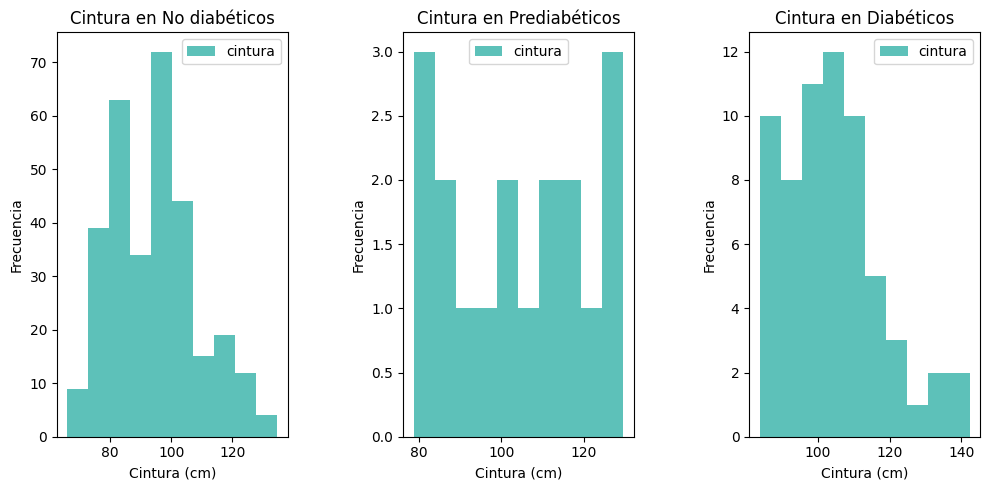

In [117]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
ax1 = plt.subplot(131)
plt.hist(df_2.query('glyhb < 5.7')['waist'], label='cintura', color='#5dc1b9')
plt.title("Cintura en No diabéticos")
plt.xlabel('Cintura (cm)')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

ax2 = plt.subplot(132)
plt.hist(df_2.query('glyhb >=5.7 & glyhb<= 6.4')['waist'], label='cintura', color='#5dc1b9')
plt.title("Cintura en Prediabéticos")
plt.xlabel('Cintura (cm)')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()


ax3 = plt.subplot(133)
plt.title("Cintura en Diabéticos")
plt.hist(df_2.query('glyhb >=6.5')['waist'],label='cintura', color='#5dc1b9')
plt.xlabel('Cintura (cm)')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

plt.subplots_adjust(hspace=0.5, wspace=0.5)



*   hip



Visualización de la cadera según los valores de hemoglobina glicosilada que pertenecen a sin diabetes, prediabéticos y diabéticos.

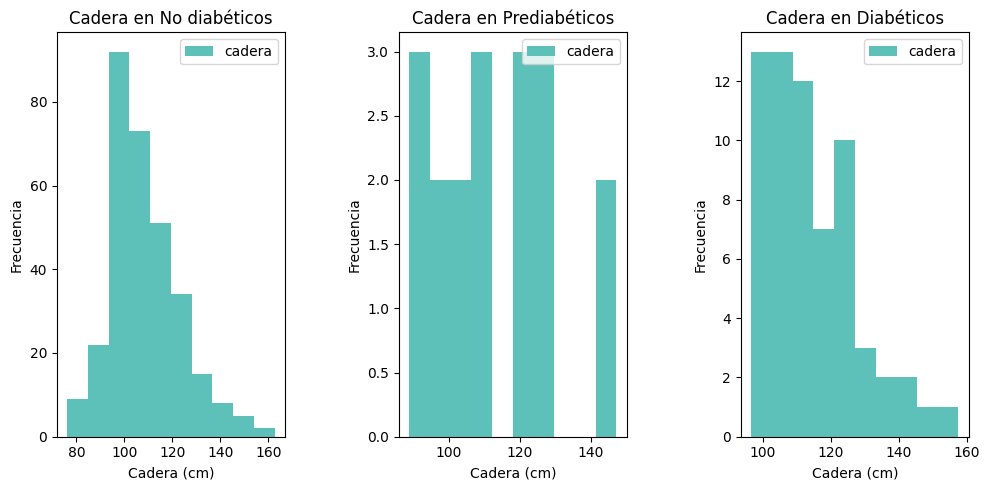

In [118]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
ax1 = plt.subplot(131)
plt.hist(df_2.query('glyhb < 5.7')['hip'], label='cadera', color='#5dc1b9')
plt.title("Cadera en No diabéticos")
plt.xlabel('Cadera (cm)')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

ax2 = plt.subplot(132)
plt.hist(df_2.query('glyhb >=5.7 & glyhb<= 6.4')['hip'], label='cadera', color='#5dc1b9')
plt.title("Cadera en Prediabéticos")
plt.xlabel('Cadera (cm)')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()


ax3 = plt.subplot(133)
plt.title("Cadera en Diabéticos")
plt.hist(df_2.query('glyhb >=6.5')['hip'],label='cadera', color='#5dc1b9')
plt.xlabel('Cadera (cm)')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

plt.subplots_adjust(hspace=0.5, wspace=0.5)

**Estudio de ouliers en las variables mediante Boxplots.**



*   chol



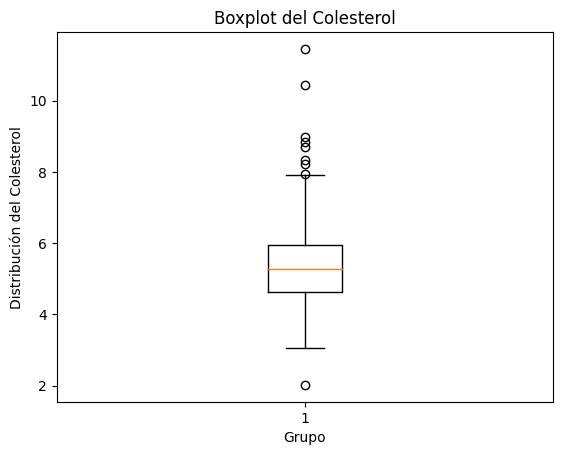

In [119]:
plt.boxplot(df_2numericas_importantes['chol'])
plt.title('Boxplot del Colesterol')
plt.xlabel('Grupo')
plt.ylabel('Distribución del Colesterol')
plt.show()



*   stab.glu



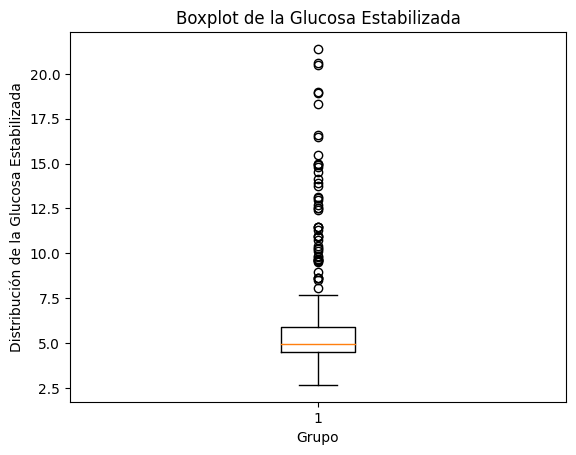

In [120]:
plt.boxplot(df_2numericas_importantes['stab.glu'])
plt.title('Boxplot de la Glucosa Estabilizada')
plt.xlabel('Grupo')
plt.ylabel('Distribución de la Glucosa Estabilizada')
plt.show()



*   hdl



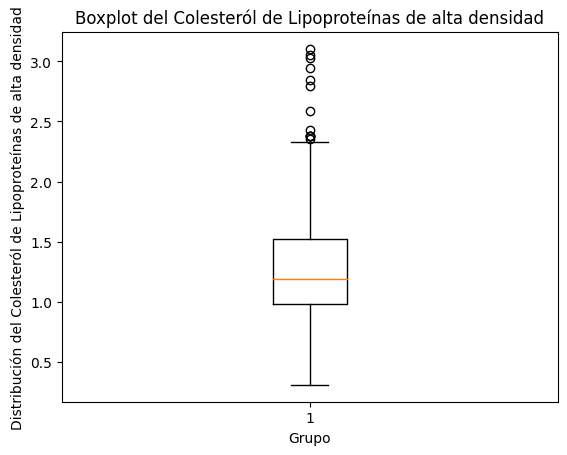

In [121]:
plt.boxplot(df_2numericas_importantes['hdl'])
plt.title('Boxplot del Colesteról de Lipoproteínas de alta densidad')
plt.xlabel('Grupo')
plt.ylabel('Distribución del Colesteról de Lipoproteínas de alta densidad')
plt.show()



*   ratio



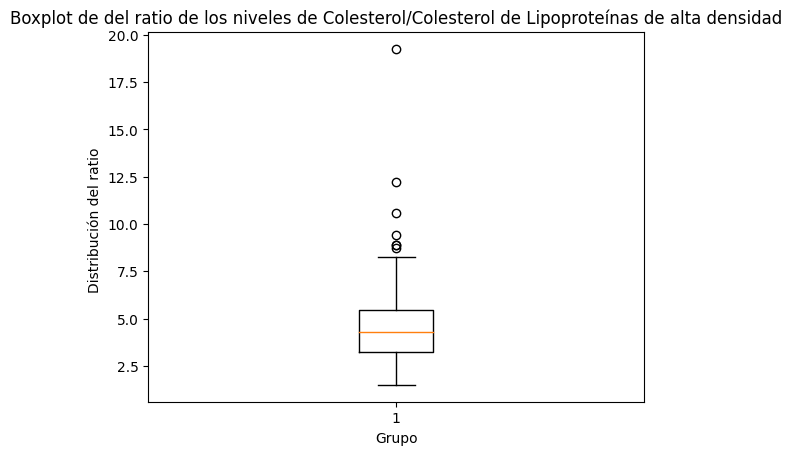

In [123]:
plt.boxplot(df_2numericas_importantes['ratio'])
plt.title('Boxplot de del ratio de los niveles de Colesterol/Colesterol de Lipoproteínas de alta densidad')
plt.xlabel('Grupo')
plt.ylabel('Distribución del ratio ')
plt.show()



*   glyhb



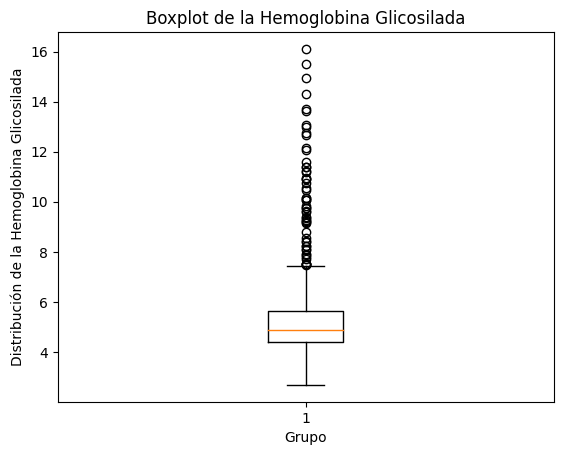

In [124]:
plt.boxplot(df_2numericas_importantes['glyhb'])
plt.title('Boxplot de la Hemoglobina Glicosilada')
plt.xlabel('Grupo')
plt.ylabel('Distribución de la Hemoglobina Glicosilada')
plt.show()



*   age



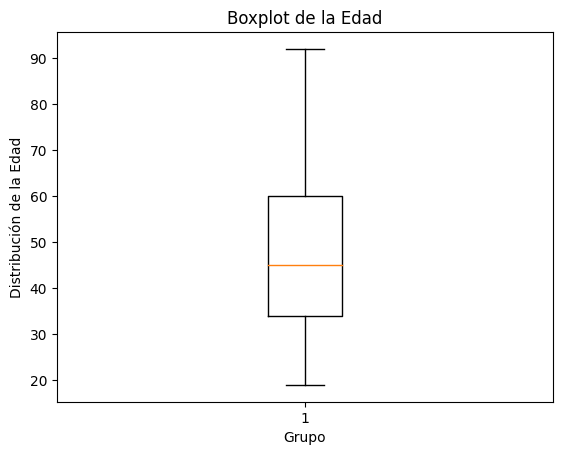

In [125]:
plt.boxplot(df_2numericas_importantes['age'])
plt.title('Boxplot de la Edad')
plt.xlabel('Grupo')
plt.ylabel('Distribución de la Edad')
plt.show()



*   height



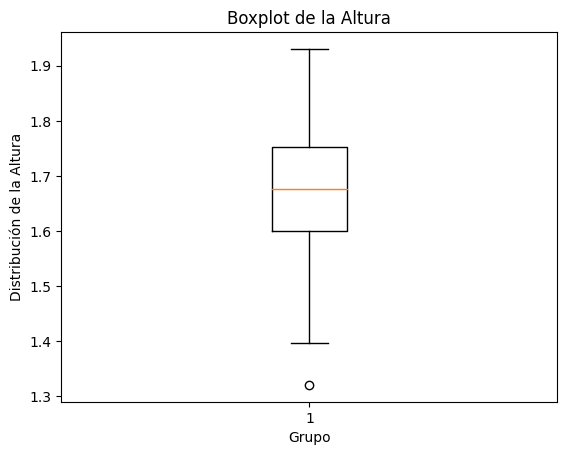

In [126]:
plt.boxplot(df_2numericas_importantes['height'])
plt.title('Boxplot de la Altura')
plt.xlabel('Grupo')
plt.ylabel('Distribución de la Altura')
plt.show()

Identificación de outlier en altura. Altura < 1.40

In [127]:
df_2numericas_importantes[df_2numericas_importantes['height'] <= 1.40]

,chol,stab.glu,hdl,ratio,glyhb,age,height,weight,bp.1s,bp.1d,waist,hip
205,5.35302,4.277778,1.18956,4.50,4.82,68,1.397003,58.956916,199.0,115.0,73.66,83.82
284,3.93072,5.722222,0.82752,4.75,4.27,40,1.320803,84.807256,148.0,82.0,96.52,124.46


Sustitución de todas las observaciones que tengan una altura inferior a 1.4 por 1.4 (límite del bigote inferior)

In [128]:
df_2.height = np.where(df_2.height < 1.4, 1.4, df_2.height)
df_2numericas_importantes.height = np.where(df_2numericas_importantes.height < 1.4, 1.4, df_2numericas_importantes.height)



*   weight



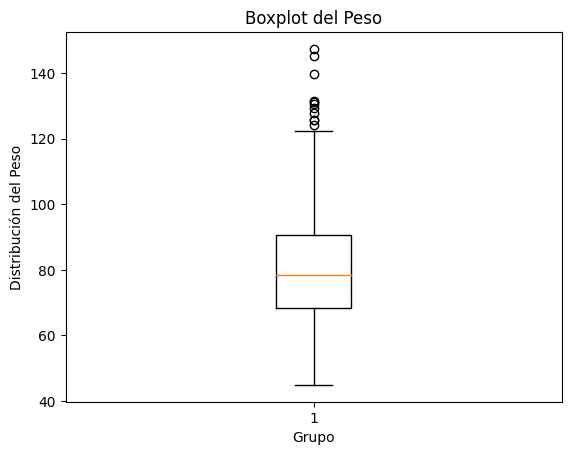

In [129]:
plt.boxplot(df_2numericas_importantes['weight'])
plt.title('Boxplot del Peso')
plt.xlabel('Grupo')
plt.ylabel('Distribución del Peso')
plt.show()



*   bp.1s



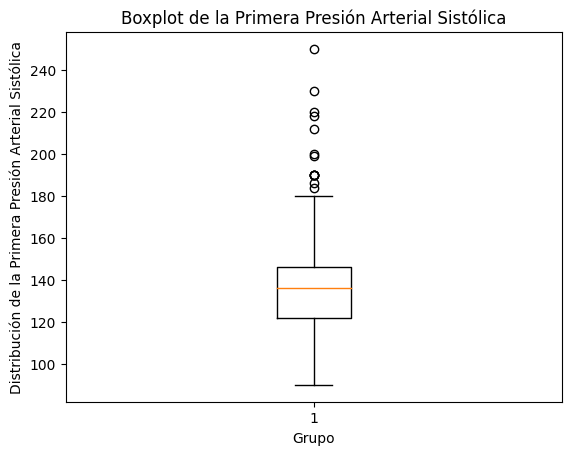

In [130]:
plt.boxplot(df_2numericas_importantes['bp.1s'])
plt.title('Boxplot de la Primera Presión Arterial Sistólica')
plt.xlabel('Grupo')
plt.ylabel('Distribución de la Primera Presión Arterial Sistólica')
plt.show()



*   bp.1d



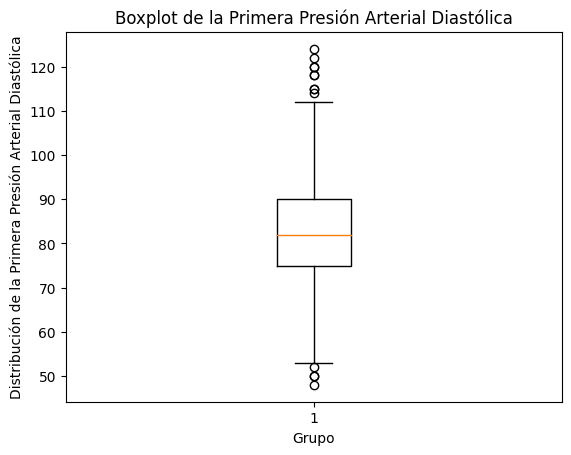

In [131]:
plt.boxplot(df_2numericas_importantes['bp.1d'])
plt.title('Boxplot de la Primera Presión Arterial Diastólica')
plt.xlabel('Grupo')
plt.ylabel('Distribución de la Primera Presión Arterial Diastólica')
plt.show()



*   waist



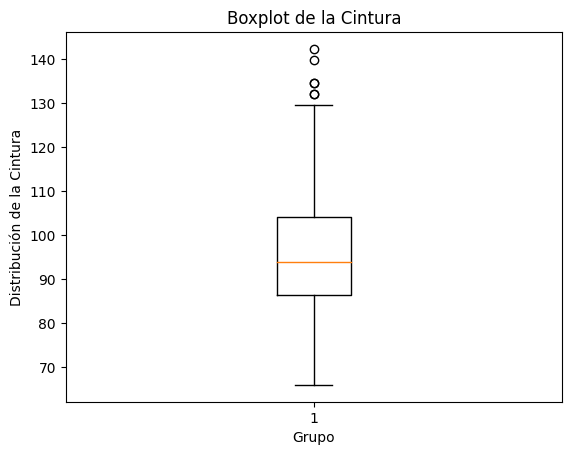

In [132]:
plt.boxplot(df_2numericas_importantes['waist'])
plt.title('Boxplot de la Cintura')
plt.xlabel('Grupo')
plt.ylabel('Distribución de la Cintura')
plt.show()



*   hip



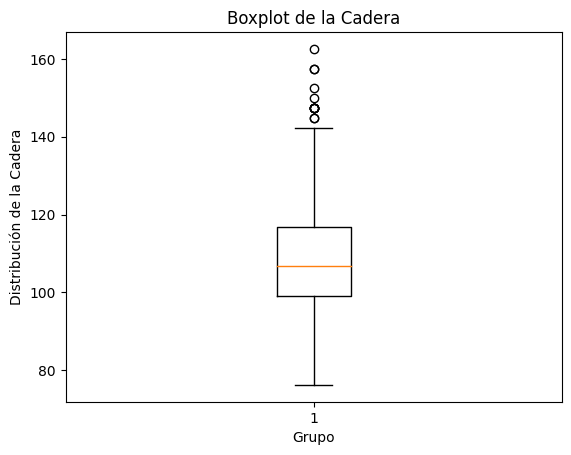

In [133]:
plt.boxplot(df_2numericas_importantes['hip'])
plt.title('Boxplot de la Cadera')
plt.xlabel('Grupo')
plt.ylabel('Distribución de la Cadera')
plt.show()

**Cálculo de la matriz de correlación para descubrir cuáles son las variables más relevantes.**

In [134]:
matriz_correlacion2 = df_2numericas_importantes.corr()
print(matriz_correlacion2)

              chol  stab.glu       hdl     ratio     glyhb       age  \
chol      1.000000  0.165277  0.183373  0.473233  0.268641  0.238125   
stab.glu  0.165277  1.000000 -0.158058  0.289717  0.741329  0.287659   
hdl       0.183373 -0.158058  1.000000 -0.691349 -0.139715  0.039574   
ratio     0.473233  0.289717 -0.691349  1.000000  0.339887  0.149508   
glyhb     0.268641  0.741329 -0.139715  0.339887  1.000000  0.337719   
age       0.238125  0.287659  0.039574  0.149508  0.337719  1.000000   
height   -0.057598  0.087552 -0.102401  0.099024  0.056679 -0.093254   
weight    0.066889  0.183440 -0.290983  0.283035  0.168213 -0.055882   
bp.1s     0.201061  0.169991  0.018648  0.119209  0.202077  0.444076   
bp.1d     0.166634  0.029050  0.063416  0.044251  0.040868  0.060042   
waist     0.117934  0.227421 -0.271580  0.301383  0.240029  0.153281   
hip       0.074149  0.139241 -0.212342  0.193250  0.150788  0.011009   

            height    weight     bp.1s     bp.1d     waist     

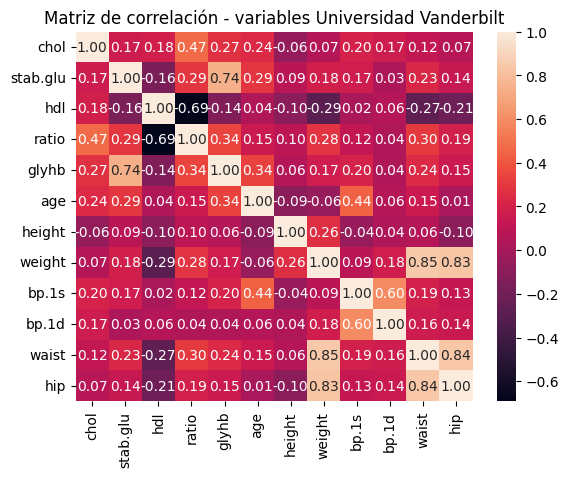

In [135]:
sns.heatmap(matriz_correlacion2, annot=True, fmt=".2f").set_title("Matriz de correlación - variables Universidad Vanderbilt")
plt.show()

Valores mayores de correlacion positiva:


*   glyhb - stab.glu (0.74)
*   bp.1s - bp.1d (0.6)
*   chol - ratio (0.48)
*   waist - ratio (0.3)
*   glyhb - ratio (0.34)
*   glyhb - age (0.33)
*   glyhb - waist (0.24)
*   height - weight (0.25)
*   weight - waist (0.85)
*   weight - hip (0.83)
*   waist - hip (0.83)
*   age - bp.1s (0.44)

Valores mayores de correlacion negativa absoluta:


*   hdl - ratio (-0.69)





**Algunas conclusiones:**
<br>
Entre las variables glyhb y stab.glu existe una alta correlación, ya que ambas variables miden los niveles de glucosa en sangre.
<br>
Por otra parte, la existencia de alta correlación entre las variables chol y ratio y hdl y ratio es lógica, ya que ratio es el resultado de dividir chol entre hdl.
<br>
Además, weight y hip poseen una correlación muy alta, porque son variables muy relacionadas.
<br>
Por último, existe una gran correlación entre la presión arterial sistólica y diastólica, porque tanto la presión sistólica como diastólicase miden cuando los ventrículos del corazón se contraen y relajan, respectivamente.

## 5.2. Variables Categóricas: Las variables categóricas existentes son Gender y Location.

### 5.2.1. Frecuencias de Gender (Female/Male) y Location (Buckingam, Louisa).

In [136]:
frec_gender2 = df_2['gender'].value_counts()
print(frec_gender2)

gender
female    234
male      167
Name: count, dtype: int64


Existen 234 mujeres y 167 hombres.

In [137]:
frec_location = df_2['location'].value_counts()
print(frec_location)

location
Louisa        202
Buckingham    199
Name: count, dtype: int64


Como podemos observar existen 199 pacientes procedentes de Louisa y 195 de Buckingham.

<BarContainer object of 2 artists>

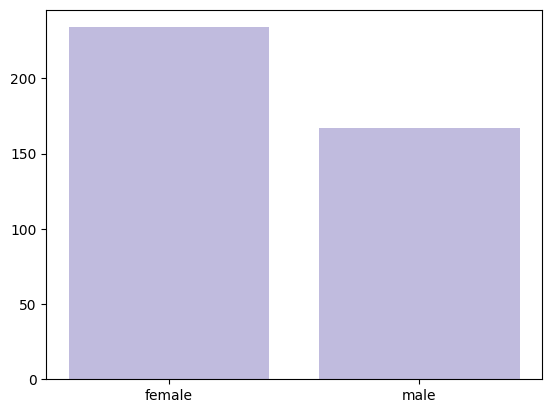

In [138]:
plt.bar(frec_gender2.index, frec_gender2.values, color='#c0bbde')

In [139]:
#  Grupos para hacer el conteo de diabetes, prediabetes y sin diabetes por genero
conteo_genero = df_2.groupby("gender")["glyhb"].value_counts(bins=[0,5.6,6.4,16.2])

# Imprimir el conteo de edades por género
print(conteo_genero)

gender  glyhb        
female  (-0.001, 5.6]    180
        (6.4, 16.2]       39
        (5.6, 6.4]        15
male    (-0.001, 5.6]    117
        (6.4, 16.2]       33
        (5.6, 6.4]        17
Name: count, dtype: int64


Visualización de la distribución de la localización

<BarContainer object of 2 artists>

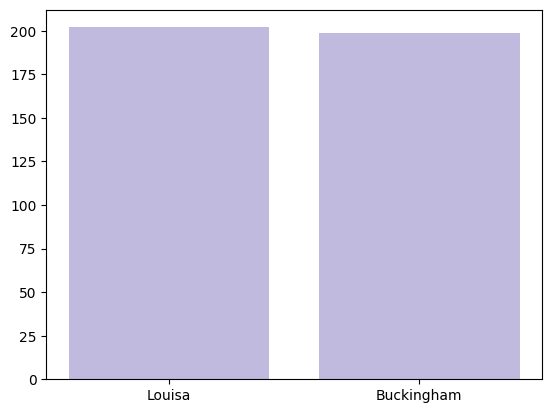

In [140]:
plt.bar(frec_location.index, frec_location.values, color='#c0bbde')

In [ ]:
# Creacion de grupos segun diabetes, prediabetes o sin diabetes de acuerdo al lugar
conteo_loc = df_2.groupby("location")["glyhb"].value_counts(bins=[0,5.6,6.4,16.2])

# Imprimir el conteo segun lugar
print(conteo_loc)

location    glyhb        
Buckingham  (-0.001, 5.6]    139
            (6.4, 16.2]       39
            (5.6, 6.4]        21
Louisa      (-0.001, 5.6]    158
            (6.4, 16.2]       33
            (5.6, 6.4]        11
Name: glyhb, dtype: int64


5.2.2. Tabla de contingencia de las variables categóricas Gender y Location.

In [141]:
tabla_contingencia2 = pd.crosstab(df_2['location'], df_2['gender'], margins=True)
print(tabla_contingencia2)

gender      female  male  All
location                     
Buckingham     114    85  199
Louisa         120    82  202
All            234   167  401




*   Porcentajes según total



In [142]:
tabla_contingencia2_porcentajes = pd.crosstab(df_2['location'], df_2['gender'], normalize='index')
print(tabla_contingencia2_porcentajes*100)

gender         female       male
location                        
Buckingham  57.286432  42.713568
Louisa      59.405941  40.594059


### 5.2.3. Prueba de chi-cuadrado entre las variables categóricas.

In [143]:
chi2_gender2, pvalue_gender2, dof_gender2, expected_gender2 = stats.chi2_contingency(df_2.groupby(["location", "gender"]).size().unstack())
print('Resultados de la prueba de chi-cuadrado:', end='\n\n')
print('Valor de chi2:',chi2_gender2, end='\n\n')
print('Valor de p-value:',pvalue_gender2, end='\n\n')
print('Valor de dof:',dof_gender2, end='\n\n')
print('Tabla expected:')
print(expected_gender2)

Resultados de la prueba de chi-cuadrado:

Valor de chi2: 0.10835187680467903

Valor de p-value: 0.7420283590059636

Valor de dof: 1

Tabla expected:
[[116.12468828  82.87531172]
 [117.87531172  84.12468828]]


Algunas conclusiones:


*   Como chi2 es de 0.074 este valor es muy bajo e indica que la distribución observada se ha producido por casualidad.
*   El p-valor al ser de 0.7853, este valor es grande (mayor que 0.5), por lo cual no podemos rechazar la hipótesis nula.


## **6. Construcción de la base de datos propia**

### 6.1. Variables



*   **Problema a resolver**



Se procederá a crear una base de datos adecuada para poder realizar posteriormente modelos predictivos para predecir la diabetes. El objetivo será clasificar a los pacientes en diabetes, prediabetes o normal.



*   **Variables de las anteriores bases que se mantendrán**



En función del análisis descriptivo de variables, se han seleccionado aquellas variables comúnes y no comúnes de ambas bases de datos que presentan mayor correlación con la variable glyhb y HbA1c (estas dos variables indican la misma información, que es el nivel de glucosa en sangre del paciente, y son variables muy relevante para poder realizar el estudio), y también se han seleccionado variables afínes a las anteriores que también son relevantes para el estudio.



1.   Variables Numéricas:
  *   Colesterol total. En la base de datos propia tendrá como nombre Chol.
  *   Hemoglobina glicosilada. En la base de datos propia tendrá como nombre HbA1c.
  *   Triglicéridos. En la base de datos propia tendrá como nombre TG.
  *   Lipoproteínas de baja densidad. En la base de datos propia tendrá como nombre LDL.
  *   Lipoproteínas de alta densidad. En la base de datos propia tendrá como nombre HDL.

2.   Variables Categóricas:
  *   Edad. En la base de datos propia tendrá como nombre Age.
  *   Género. En la base de datos propia tendrá como nombre Gender.










*   **Variables que se crearán**





1.   Variables Numéricas
  *   IMC (Índice de Masa Corporal), esta variable está presente en la base de datos procedente de la sociedad de Irak, pero en la base de datos de la Universidad de Vanderbilt no está presente, y se creará esta variable dividiendo el peso entre la altura de los pacientes. En la base de datos tendrá como nombre BMI.

2.   Variable Categórica - Target
  *    Clase, creación de esta variable que está presente en la base de datos procedentes de la sociedad de Irak, pero en la base de datos de la Universidad de Vanderbilt no está presente, y se creará esta variable según los niveles de glyhb, según los siguientes niveles:

      *   Niveles < 5.7% indica niveles normales.
      *   Niveles entre 5.7% y 6.4% indican prediabetes.
      *   Niveles > 6.5% indican diabetes.
  
  En la base de datos propia tendrá como nombre Class.


### **6.2. Creación de la base de datos propia.**

Creación de la base de datos vacía

In [144]:
df_propio = pd.DataFrame(data=None, index=None, columns=None)

Copia de la base de datos 1 y eliminación de las variables que no se vayan a utilizar

In [145]:
df_1_copia = df_1.copy()
df_1_copia = df_1_copia.drop(["Urea", "Cr", "No_Pation", "VLDL", "ID"], axis=1)
df_1_copia.rename(columns={'AGE': 'Age', 'CLASS':'Class'}, inplace=True)
df_1_copia.head()

,Gender,Age,HbA1c,Chol,TG,HDL,LDL,BMI,Class
0,F,50,4.9,4.2,0.9,2.4,1.4,24.0,N
1,M,26,4.9,3.7,1.4,1.1,2.1,23.0,N
2,F,50,4.9,4.2,0.9,2.4,1.4,24.0,N
3,F,50,4.9,4.2,0.9,2.4,1.4,24.0,N
4,M,33,4.9,4.9,1.0,0.8,2.0,21.0,N


Copia de la base de datos 2, eliminación de las variable que no se vayan a usar y creación de las nuevas

In [146]:
df_2_copia = df_2
df_2_copia = df_2_copia.drop(["stab.glu", "ratio", "location", "id", "waist", "hip", "bp.1s", "bp.1d"], axis=1)
df_2_copia.rename(columns={'chol': 'Chol', 'hdl': 'HDL', 'glyhb': 'HbA1c', 'age': 'Age', 'gender': 'Gender'}, inplace=True)
df_2_copia.replace(['female', 'male'], ['F', 'M'], inplace=True)

**Creación de las nuevas variables**

In [147]:
# Creacion columna BMI
df_2_copia = df_2_copia.assign(BMI=df_2_copia.weight/(df_2_copia.height*df_2_copia.height))
# Creacion columna class con sus respectivos valores
df_2_copia = df_2_copia.assign(Class=pd.Series([None], dtype='object'))

def asignar_class(row):
  resultado = 'N'
  if row['HbA1c'] >= 5.7 and row['HbA1c'] <= 6.4:
    resultado = 'P'
  elif row['HbA1c'] >= 6.5:
    resultado = 'Y'
  return resultado
df_2_copia['Class'] = df_2_copia.apply(asignar_class, axis=1)

**Eliminación de las variables irrelevantes**

In [148]:
df_2_copia = df_2_copia.drop(["weight", "height"], axis=1)
df_2_copia.head()

,Chol,HDL,HbA1c,Age,Gender,BMI,Class
0,5.24958,1.44816,4.31,46,F,22.127086,N
1,4.26690,0.62064,4.44,29,F,37.412677,N
2,5.89608,0.95682,4.64,58,F,48.361808,N
3,2.01708,0.31032,4.63,67,M,18.634579,N
4,6.43914,0.72408,7.72,64,M,27.819896,Y


In [149]:
df_propio = pd.merge(df_2_copia, df_1_copia, on=['Chol', 'HDL', 'HbA1c', 'Gender', 'Age', 'BMI', 'Class'], how='outer')
df_propio.insert(0, 'ID', range(1, df_propio.shape[0] + 1))
df_propio.head()

,ID,Chol,HDL,HbA1c,Age,Gender,BMI,Class,TG,LDL
0,1,5.24958,1.44816,4.31,46,F,22.127086,N,NaN,NaN
1,2,4.26690,0.62064,4.44,29,F,37.412677,N,NaN,NaN
2,3,5.89608,0.95682,4.64,58,F,48.361808,N,NaN,NaN
3,4,2.01708,0.31032,4.63,67,M,18.634579,N,NaN,NaN
4,5,6.43914,0.72408,7.72,64,M,27.819896,Y,NaN,NaN


Valores 0 y NA.

In [150]:
df_propio.isnull().sum()

ID          0
Chol        0
HDL         0
HbA1c       0
Age         0
Gender      0
BMI         0
Class       0
TG        401
LDL       401
dtype: int64

In [151]:
df_propio.eq(0).sum()

ID        0
Chol      0
HDL       0
HbA1c     0
Age       0
Gender    0
BMI       0
Class     0
TG        0
LDL       0
dtype: int64

Se sustituye los valores de NA de las variables TG y LDL mediante el método de imputación, donde se asignarán los valores en función de hombre o mujer con la media de las siguientes franjas de edades:


*   18-30 años
*   31-64 años
*   65 años y mayores



In [152]:
# Trigiliceridos medios por genero en las anteriores franjas de edad
TG_medio_mujeres_30menos= df_1_copia.query('Gender == "F" & (Age >= 18 & Age <= 30)')['TG'].mean()
TG_medio_mujeres_65menos= df_1_copia.query('Gender == "F" & (Age >= 31 & Age <= 64)')['TG'].mean()
TG_medio_mujeres_65mas = df_1_copia.query('Gender == "F" & (Age >= 65)')['TG'].mean()

# Trigiliceridos medios por genero en las anteriores franjas de edad
TG_medio_hombres_30menos= df_1_copia.query('Gender == "M" & (Age >= 18 & Age <= 30)')['TG'].mean()
TG_medio_hombres_65menos= df_1_copia.query('Gender == "M" & (Age >= 31 & Age <= 64)')['TG'].mean()
TG_medio_hombres_65mas = df_1_copia.query('Gender == "M" & (Age >= 65)')['TG'].mean()

# Valores resultantes
print('Valor medio de TG en mujeres 19-30 años:', TG_medio_mujeres_30menos)
print('Valor medio de TG en mujeres 31-64 años:', TG_medio_mujeres_65menos)
print('Valor medio de TG en mujeres 65 años o mayores:', TG_medio_mujeres_65mas)

print('Valor medio de TG en hombres 19-30 años:', TG_medio_hombres_30menos)
print('Valor medio de TG en hombres 31-64 años:', TG_medio_hombres_65menos)
print('Valor medio de TG en hombres 65 años o mayores:', TG_medio_hombres_65mas)

Valor medio de TG en mujeres 19-30 años: 1.9545454545454548
Valor medio de TG en mujeres 31-64 años: 2.2746867167919804
Valor medio de TG en mujeres 65 años o mayores: 2.2720000000000002
Valor medio de TG en hombres 19-30 años: 1.7375000000000003
Valor medio de TG en hombres 31-64 años: 2.419865125240848
Valor medio de TG en hombres 65 años o mayores: 2.662068965517242


In [153]:
# LDL medios por genero en las anteriores franjas de edad
LDL_medio_mujeres_30menos= df_1_copia.query('Gender == "F" & (Age >= 18 & Age <= 30)')['LDL'].mean()
LDL_medio_mujeres_65menos= df_1_copia.query('Gender == "F" & (Age >= 31 & Age <= 64)')['LDL'].mean()
LDL_medio_mujeres_65mas = df_1_copia.query('Gender == "F" & (Age >= 65)')['LDL'].mean()

# LDL medios por genero en las anteriores franjas de edad
LDL_medio_hombres_30menos= df_1_copia.query('Gender == "M" & (Age >= 18 & Age <= 30)')['LDL'].mean()
LDL_medio_hombres_65menos= df_1_copia.query('Gender == "M" & (Age >= 31 & Age <= 64)')['LDL'].mean()
LDL_medio_hombres_65mas = df_1_copia.query('Gender == "M" & (Age >= 65)')['LDL'].mean()

# Valores resultantes
print('Valor medio de LDL en mujeres 18-30 años:', LDL_medio_mujeres_30menos)
print('Valor medio de LDL en mujeres 31-64 años:', LDL_medio_mujeres_65menos)
print('Valor medio de LDL en mujeres 65 años o mayores:', LDL_medio_mujeres_65mas)

print('Valor medio de LDL en hombres 18-30 años:', LDL_medio_hombres_30menos)
print('Valor medio de LDL en hombres 31-64 años:', LDL_medio_hombres_65menos)
print('Valor medio de LDL en hombres 65 años o mayores:', LDL_medio_hombres_65mas)

Valor medio de LDL en mujeres 18-30 años: 2.9181818181818184
Valor medio de LDL en mujeres 31-64 años: 2.502406015037594
Valor medio de LDL en mujeres 65 años o mayores: 2.9819999999999998
Valor medio de LDL en hombres 18-30 años: 2.8375
Valor medio de LDL en hombres 31-64 años: 2.6390751445086704
Valor medio de LDL en hombres 65 años o mayores: 3.027586206896552


In [154]:
def sustituir_na_TG(row):
    retorno = row['TG']
    if row['Age'] >=18 and row['Age'] <=30 and row['Gender'] == 'F' and pd.isna(row['TG']):
        retorno = TG_medio_mujeres_30menos
    elif row['Age'] >= 31 and row['Age']<=64 and row['Gender'] == 'F' and pd.isna(row['TG']):
        retorno = TG_medio_mujeres_65menos
    elif row['Age'] > 64 and row['Gender'] == 'F' and pd.isna(row['TG']):
        retorno = TG_medio_mujeres_65mas
    elif row['Age'] >=18 and row['Age'] <=30 and row['Gender'] == 'M' and pd.isna(row['TG']):
        retorno = TG_medio_hombres_30menos
    elif row['Age'] >= 31 and row['Age']<=64 and row['Gender'] == 'M' and pd.isna(row['TG']):
        retorno = TG_medio_hombres_65menos
    elif row['Age'] > 64 and row['Gender'] == 'M' and pd.isna(row['TG']):
        retorno = TG_medio_hombres_65mas
    return retorno

def sustituir_na_LDL(row):
    retorno = row['LDL']
    if row['Age'] >=18 and row['Age'] <=30 and row['Gender'] == 'F' and pd.isna(row['LDL']):
        retorno = LDL_medio_mujeres_30menos
    elif row['Age'] >= 31 and row['Age']<=64 and row['Gender'] == 'F' and pd.isna(row['LDL']):
        retorno = LDL_medio_mujeres_65menos
    elif row['Age'] > 64 and row['Gender'] == 'F' and pd.isna(row['LDL']):
        retorno = LDL_medio_mujeres_65mas
    elif row['Age'] >=18 and row['Age'] <=30 and row['Gender'] == 'M' and pd.isna(row['LDL']):
        retorno = LDL_medio_hombres_30menos
    elif row['Age'] >= 31 and row['Age']<=64 and row['Gender'] == 'M' and pd.isna(row['LDL']):
        retorno = LDL_medio_hombres_65menos
    elif row['Age'] > 64 and row['Gender'] == 'M' and pd.isna(row['LDL']):
        retorno = LDL_medio_hombres_65mas
    return retorno

df_propio['TG'] = df_propio.apply(sustituir_na_TG, axis=1)
df_propio['LDL'] = df_propio.apply(sustituir_na_LDL, axis=1)

Comprobamos que no hay nulos ni NA

In [155]:
df_propio.isnull().sum()

ID        0
Chol      0
HDL       0
HbA1c     0
Age       0
Gender    0
BMI       0
Class     0
TG        0
LDL       0
dtype: int64

In [156]:
df_propio.eq(0).sum()

ID        0
Chol      0
HDL       0
HbA1c     0
Age       0
Gender    0
BMI       0
Class     0
TG        0
LDL       0
dtype: int64

Comprobación de la forma de la base de datos

In [157]:
print('No. Observaciones:', df_propio.shape[0])
print('No. Variables:', df_propio.shape[1])

No. Observaciones: 1400
No. Variables: 10


In [158]:
df_propio.dtypes

ID          int64
Chol      float64
HDL       float64
HbA1c     float64
Age         int64
Gender     object
BMI       float64
Class      object
TG        float64
LDL       float64
dtype: object

Cabecera de la base de datos propia

In [159]:
df_propio.head()

,ID,Chol,HDL,HbA1c,Age,Gender,BMI,Class,TG,LDL
0,1,5.24958,1.44816,4.31,46,F,22.127086,N,2.274687,2.502406
1,2,4.26690,0.62064,4.44,29,F,37.412677,N,1.954545,2.918182
2,3,5.89608,0.95682,4.64,58,F,48.361808,N,2.274687,2.502406
3,4,2.01708,0.31032,4.63,67,M,18.634579,N,2.662069,3.027586
4,5,6.43914,0.72408,7.72,64,M,27.819896,Y,2.419865,2.639075


In [160]:
print(df_propio)

        ID     Chol      HDL  HbA1c  Age Gender        BMI Class        TG  \
0        1  5.24958  1.44816   4.31   46      F  22.127086     N  2.274687   
1        2  4.26690  0.62064   4.44   29      F  37.412677     N  1.954545   
2        3  5.89608  0.95682   4.64   58      F  48.361808     N  2.274687   
3        4  2.01708  0.31032   4.63   67      M  18.634579     N  2.662069   
4        5  6.43914  0.72408   7.72   64      M  27.819896     Y  2.419865   
...    ...      ...      ...    ...  ...    ...        ...   ...       ...   
1395  1396  5.30000  1.00000   9.30   57      F  29.000000     Y  3.300000   
1396  1397  5.00000  1.90000   8.50   55      M  27.000000     Y  2.500000   
1397  1398  4.50000  1.10000   8.50   28      M  37.000000     Y  1.900000   
1398  1399  4.90000  1.20000   7.70   69      M  37.000000     Y  1.900000   
1399  1400  7.50000  1.20000   7.00   71      M  30.000000     Y  1.700000   

           LDL  
0     2.502406  
1     2.918182  
2     2.5024

Estadísticos importantes

In [161]:
df_propio.describe()

,ID,Chol,HDL,HbA1c,Age,BMI,TG,LDL
count,1400.0000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,700.5000,5.014680,1.233881,7.508460,51.590000,29.355153,2.326568,2.634058
std,404.2895,1.273379,0.608609,2.726010,11.849203,5.464219,1.190382,0.948482
min,1.0000,0.500000,0.200000,0.900000,19.000000,16.000710,0.300000,0.300000
25%,350.7500,4.200000,0.900000,5.100000,45.000000,25.393327,1.700000,2.100000
50%,700.5000,4.900000,1.100000,7.100000,54.000000,29.283268,2.272000,2.600000
75%,1050.2500,5.700000,1.400000,9.425000,59.000000,33.000000,2.500000,3.027586
max,1400.0000,11.455980,9.900000,16.110001,92.000000,55.775780,13.800000,9.900000


Visualización de outliers en variables de la base de datos propia



*   HbA1c



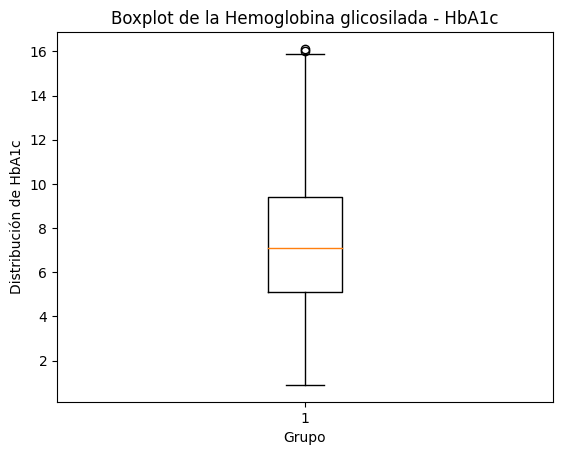

In [162]:
plt.boxplot(df_propio['HbA1c'])
plt.title('Boxplot de la Hemoglobina glicosilada - HbA1c')
plt.xlabel('Grupo')
plt.ylabel('Distribución de HbA1c')
plt.show()



*   Chol



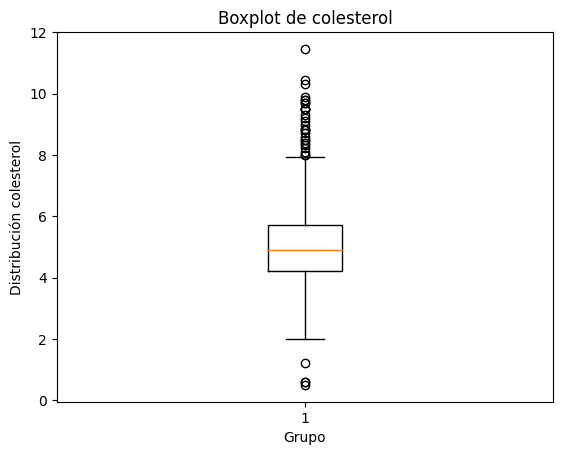

In [163]:
plt.boxplot(df_propio['Chol'])
plt.title('Boxplot de colesterol')
plt.xlabel('Grupo')
plt.ylabel('Distribución colesterol')
plt.show()



*   TG



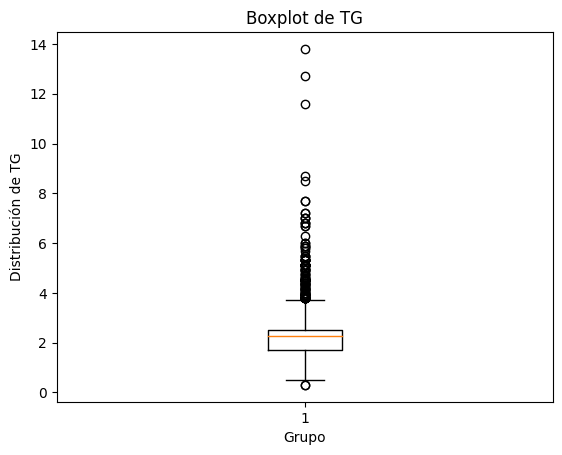

In [164]:
plt.boxplot(df_propio['TG'])
plt.title('Boxplot de TG')
plt.xlabel('Grupo')
plt.ylabel('Distribución de TG')
plt.show()

Gráficos de dispersión entre HbA1c y otras variables



*   HbA1c y Edad



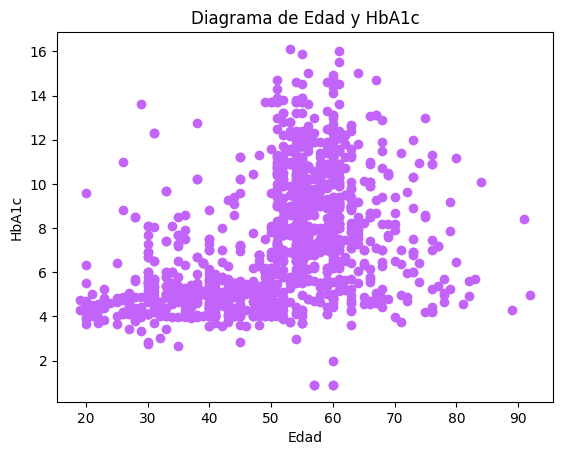

In [165]:
plt.scatter(df_propio['Age'], df_propio['HbA1c'], color='#c263f9')
plt.title('Diagrama de Edad y HbA1c')
plt.xlabel('Edad')
plt.ylabel('HbA1c')
plt.show()



*   HbA1c y Chol



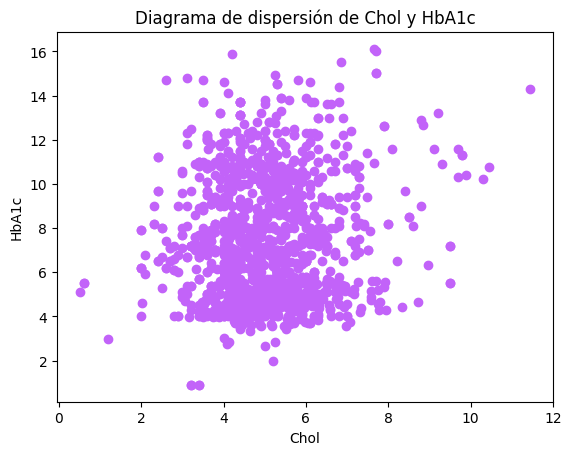

In [166]:
plt.scatter(df_propio['Chol'], df_propio['HbA1c'], color='#c263f9')
plt.title('Diagrama de dispersión de Chol y HbA1c')
plt.xlabel('Chol')
plt.ylabel('HbA1c')
plt.show()



*   HbA1c y BMI



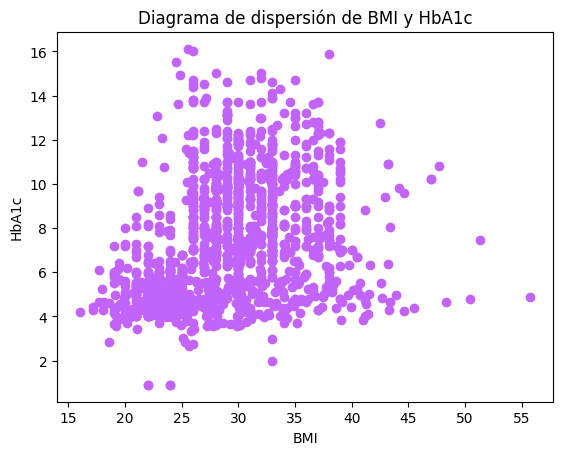

In [167]:
plt.scatter(df_propio['BMI'], df_propio['HbA1c'], color='#c263f9')
plt.title('Diagrama de dispersión de BMI y HbA1c')
plt.xlabel('BMI')
plt.ylabel('HbA1c')
plt.show()

Visualización de la distribución de la diabetes en la base de datos propia

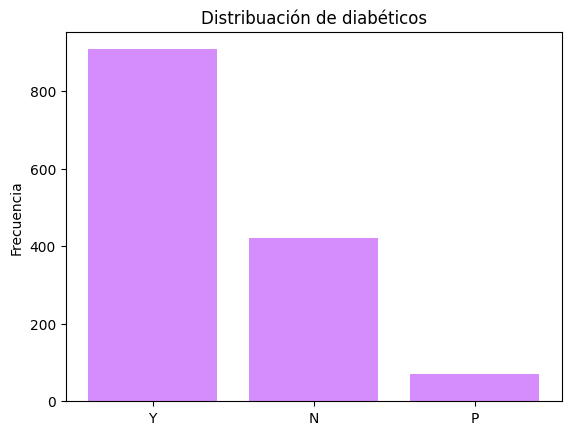

In [168]:
frec_Class = df_propio['Class'].value_counts()
fig, ax = plt.subplots()
ax.set_ylabel("Frecuencia")
plt.bar(frec_Class.index, frec_Class.values, color='#d58cfc')
plt.title("Distribuación de diabéticos")
plt.show()

In [169]:
frec_Class = df_propio['Class'].value_counts()
print(frec_Class)

Class
Y    908
N    421
P     71
Name: count, dtype: int64


Tabla de contingencia entre Class y Gender

In [170]:
tabla_contingencia_propio = pd.crosstab(df_propio['Class'], df_propio['Gender'], margins=True)
print(tabla_contingencia_propio)

Gender    F    M   All
Class                 
N       251  170   421
P        28   43    71
Y       390  518   908
All     669  731  1400


Visualización de la diabetes por edad en la base de datos propia

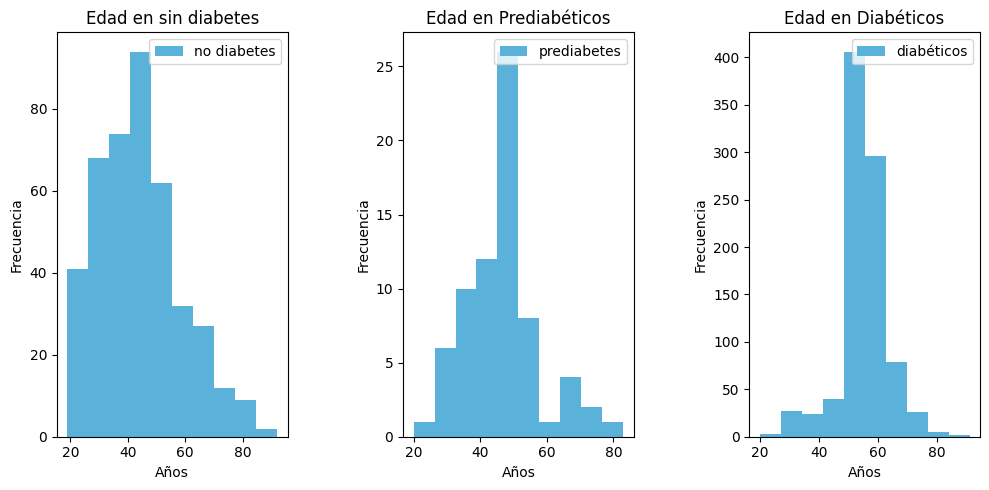

In [171]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
ax1 = plt.subplot(131)
plt.hist(df_propio.query('Class == "N"')['Age'], label='no diabetes', color='#5ab2da')
plt.title("Edad en sin diabetes")
plt.xlabel('Años')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

ax2 = plt.subplot(132)
plt.hist(df_propio.query('Class == "P"')['Age'], label='prediabetes', color='#5ab2da')
plt.title("Edad en Prediabéticos")
plt.xlabel('Años')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()


ax3 = plt.subplot(133)
plt.title("Edad en Diabéticos")
plt.hist(df_propio.query('Class == "Y"')['Age'],label='diabéticos', color='#5ab2da')
plt.xlabel('Años')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

plt.subplots_adjust(hspace=0.5, wspace=0.5)

Visualización de la distribución de la diabetes por BMI en la base de datos propia.

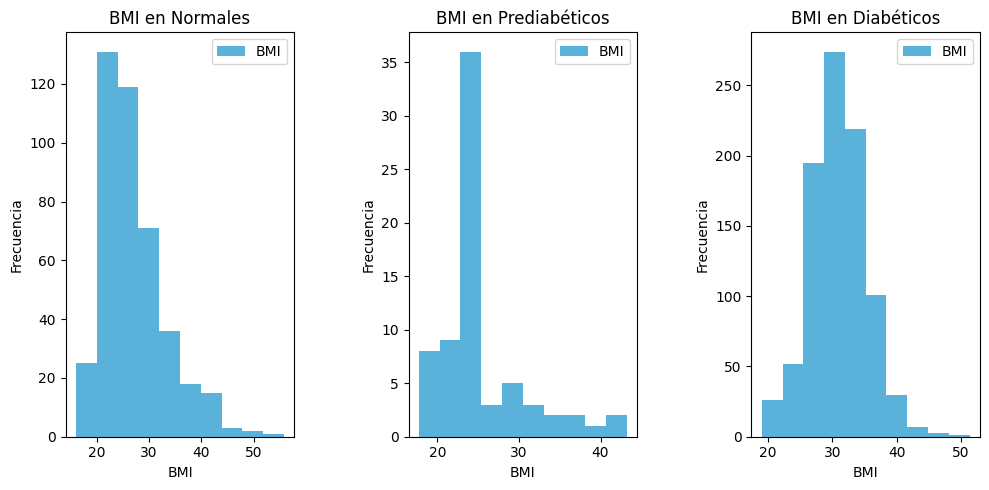

In [172]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
ax1 = plt.subplot(131)
plt.hist(df_propio.query('Class == "N"')['BMI'], label='BMI', color='#5ab2da')
plt.title("BMI en Normales")
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

ax2 = plt.subplot(132)
plt.hist(df_propio.query('Class == "P"')['BMI'], label='BMI', color='#5ab2da')
plt.title("BMI en Prediabéticos")
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()


ax3 = plt.subplot(133)
plt.title("BMI en Diabéticos")
plt.hist(df_propio.query('Class == "Y"')['BMI'],label='BMI', color='#5ab2da')
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

plt.subplots_adjust(hspace=0.5, wspace=0.5)

Visualización de la distribución de la diabetes por colesterol en la base de datos propia.

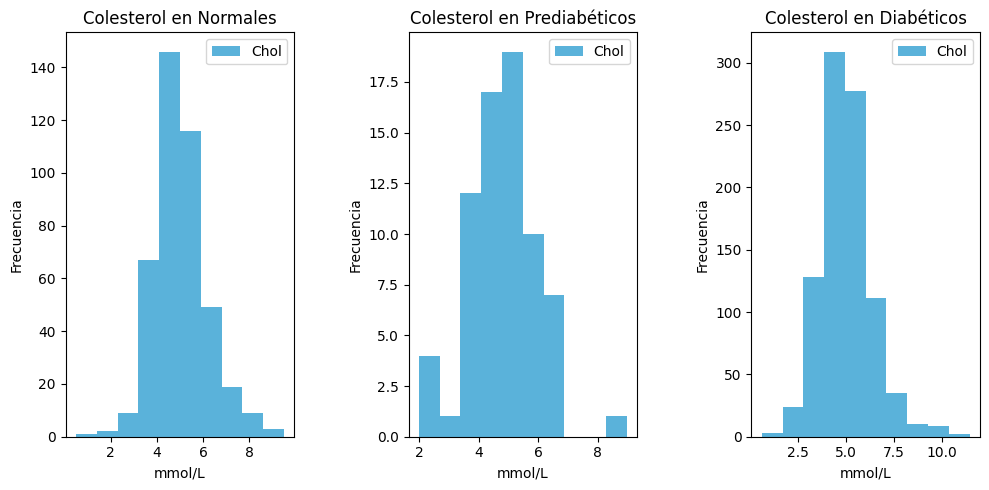

In [173]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
ax1 = plt.subplot(131)
plt.hist(df_propio.query('Class == "N"')['Chol'], label='Chol', color='#5ab2da')
plt.title("Colesterol en Normales")
plt.xlabel('mmol/L')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

ax2 = plt.subplot(132)
plt.hist(df_propio.query('Class == "P"')['Chol'], label='Chol', color='#5ab2da')
plt.title("Colesterol en Prediabéticos")
plt.xlabel('mmol/L')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()


ax3 = plt.subplot(133)
plt.title("Colesterol en Diabéticos")
plt.hist(df_propio.query('Class == "Y"')['Chol'],label='Chol', color='#5ab2da')
plt.xlabel('mmol/L')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

plt.subplots_adjust(hspace=0.5, wspace=0.5)

Visualización de la distribución de la diabetes por LDL en la base de datos propia.

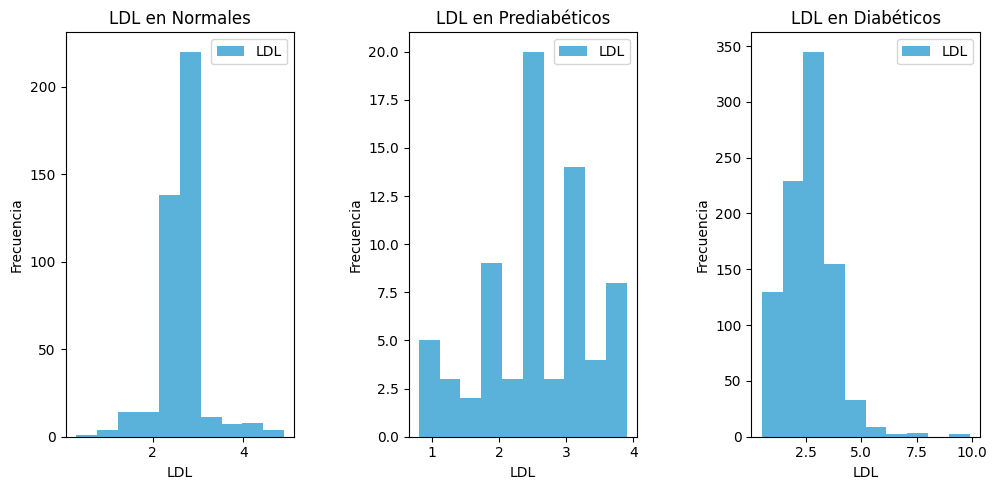

In [174]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
ax1 = plt.subplot(131)
plt.hist(df_propio.query('Class == "N"')['LDL'], label='LDL', color='#5ab2da')
plt.title("LDL en Normales")
plt.xlabel('LDL')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

ax2 = plt.subplot(132)
plt.hist(df_propio.query('Class == "P"')['LDL'], label='LDL', color='#5ab2da')
plt.title("LDL en Prediabéticos")
plt.xlabel('LDL')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()


ax3 = plt.subplot(133)
plt.title("LDL en Diabéticos")
plt.hist(df_propio.query('Class == "Y"')['LDL'],label='LDL', color='#5ab2da')
plt.xlabel('LDL')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

plt.subplots_adjust(hspace=0.5, wspace=0.5)

Visualización de la distribución de la diabetes por HDL en la base de datos propia.

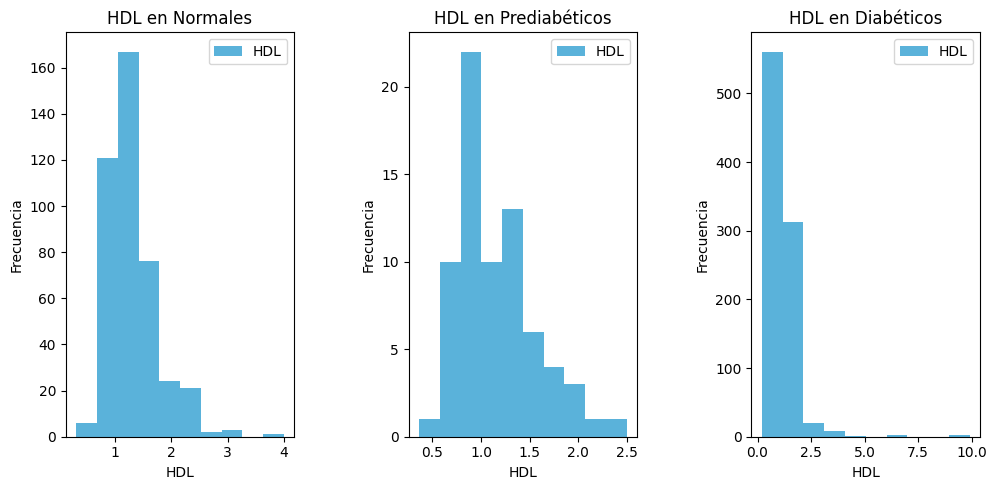

In [175]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
ax1 = plt.subplot(131)
plt.hist(df_propio.query('Class == "N"')['HDL'], label='HDL', color='#5ab2da')
plt.title("HDL en Normales")
plt.xlabel('HDL')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

ax2 = plt.subplot(132)
plt.hist(df_propio.query('Class == "P"')['HDL'], label='HDL', color='#5ab2da')
plt.title("HDL en Prediabéticos")
plt.xlabel('HDL')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()


ax3 = plt.subplot(133)
plt.title("HDL en Diabéticos")
plt.hist(df_propio.query('Class == "Y"')['HDL'],label='HDL', color='#5ab2da')
plt.xlabel('HDL')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

plt.subplots_adjust(hspace=0.5, wspace=0.5)

Cambiar las variables categóricas a numéricas para la posterior modelización, en las variables Gender y HbA1c.

In [176]:
# Gender : 0 - Mujer y 1 - Hombre
def reemplazar_gender(valor):
    result = 0
    if valor == 'F':
        result
    else:
        result = 1
    return result

df_propio['Gender'] = df_propio['Gender'].apply(reemplazar_gender)

# HbA1c: 0 - Normal, 1- Prediabetes y 2 - Diabetes
def reemplazar_class(valor):
    result = 0
    if valor == 'N':
        result = 0
    elif valor == 'P':
        result = 1
    else:
        result = 2
    return result

df_propio['Class'] = df_propio['Class'].apply(reemplazar_class)

**Convertir a csv**

In [177]:
df_propio.to_csv("DiabetesPropio.csv", index=False)